# Pump It Up: Data Mining the Water Table (Competition)
## DrivenData.org Practice Competition

**Can you predict which water pumps are faulty?**

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

#### Reference:
DrivenData. (2015). Pump it Up: Data Mining the Water Table. Retrieved July 17, 2024 from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table.

## Data Dictionary
The features in this dataset
Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` - Total static head (amount water available to waterpoint)
- `date_recorded` - The date the row was entered
- `funder` - Who funded the well
- `gps_height` - Altitude of the well
- `installer` - Organization that installed the well
- `longitude` - GPS coordinate
- `latitude` - GPS coordinate
- `wpt_name` - Name of the waterpoint if there is one
- `num_private` -
- `basin` - Geographic water basin
- `subvillage` - Geographic location
- `region` - Geographic location
- `region_code` - Geographic location (coded)
- `district_code` - Geographic location (coded)
- `lga` - Geographic location
- `ward` - Geographic location
- `population` - Population around the well
- `public_meeting` - True/False
- `recorded_by` - Group entering this row of data
- `scheme_management` - Who operates the waterpoint
- `scheme_name` - Who operates the waterpoint
- `permit` - If the waterpoint is permitted
- `construction_year` - Year the waterpoint was constructed
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `extraction_type_class` - The kind of extraction the waterpoint uses
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed
- `payment` - What the water costs
- `payment_type` - What the water costs
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water
- `quantity` - The quantity of water
- `quantity_group` - The quantity of water
- `source` - The source of the water
- `source_type` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint
- `waterpoint_type_group` - The kind of waterpoint

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data
train_label = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DD Pump It Up/train_labels.csv')
train_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DD Pump It Up/train_values.csv')
test_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DD Pump It Up/test_values.csv')
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DD Pump It Up/SubmissionFormat.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Joining `status_group` to other features on column `id`
train_df = pd.merge(train_features, train_label, on='id')
train_df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantity_group                source  \
0          good        enough          enough                spring   
1          good  insufficient    insufficient  rainwater harvesting   
2          good        enough          enough                   dam   
3          good           dry             dry           machine dbh   
4          good      seasonal        seasonal  rainwater harvesting   

            source_type source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3              borehole  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

  waterpoint_type_group    status_group  
0    communal standpipe      functional  
1    communal standpipe      functional  
2    communal standpipe      functional  
3    communal standpipe  non functional  
4    communal standpipe      functional  

[5 rows x 41 columns]

## EDA

In [ ]:
# What kind of data are we looking at?
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
# Summary statistics of numeric features
train_df.describe().T

count          mean           std       min  \
id                 59400.0  37115.131768  21453.128371   0.00000   
amount_tsh         59400.0    317.650385   2997.574558   0.00000   
gps_height         59400.0    668.297239    693.116350 -90.00000   
longitude          59400.0     34.077427      6.567432   0.00000   
latitude           59400.0     -5.706033      2.946019 -11.64944   
num_private        59400.0      0.474141     12.236230   0.00000   
region_code        59400.0     15.297003     17.587406   1.00000   
district_code      59400.0      5.629747      9.633649   0.00000   
population         59400.0    179.909983    471.482176   0.00000   
construction_year  59400.0   1300.652475    951.620547   0.00000   

                            25%           50%           75%           max  
id                 18519.750000  37061.500000  55656.500000  7.424700e+04  
amount_tsh             0.000000      0.000000     20.000000  3.500000e+05  
gps_height             0.000000    369.000000   1319.250000  2.770000e+03  
longitude             33.090347     34.908743     37.178387  4.034519e+01  
latitude              -8.540621     -5.021597     -3.326156 -2.000000e-08  
num_private            0.000000      0.000000      0.000000  1.776000e+03  
region_code            5.000000     12.000000     17.000000  9.900000e+01  
district_code          2.000000      3.000000      5.000000  8.000000e+01  
population             0.000000     25.000000    215.000000  3.050000e+04  
construction_year      0.000000   1986.000000   2004.000000  2.013000e+03

In [ ]:
# Check for duplicates
train_df.duplicated().sum()

0

In [ ]:
# Look at missing values
missing = train_df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

scheme_name          28810
scheme_management     3878
installer             3655
funder                3637
public_meeting        3334
permit                3056
subvillage             371
wpt_name                 2
dtype: int64

There are fortunately no duplicates (thank you competition dataset), but there are missing values.

We will eventually replace missing values with 'nan'.

In [ ]:
# Define the order for 'status_group'
status_order = ['functional', 'functional needs repair', 'non functional']

In [ ]:
# Plot the distribution of 'status_group'
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='status_group', hue='status_group', hue_order=status_order)

plt.title('Distribution of Status Group')
plt.xlabel('Status Group')
plt.ylabel('Count')

plt.show()

In [ ]:
# Separate train_df into numeric and categorical variables
numeric_columns = train_df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

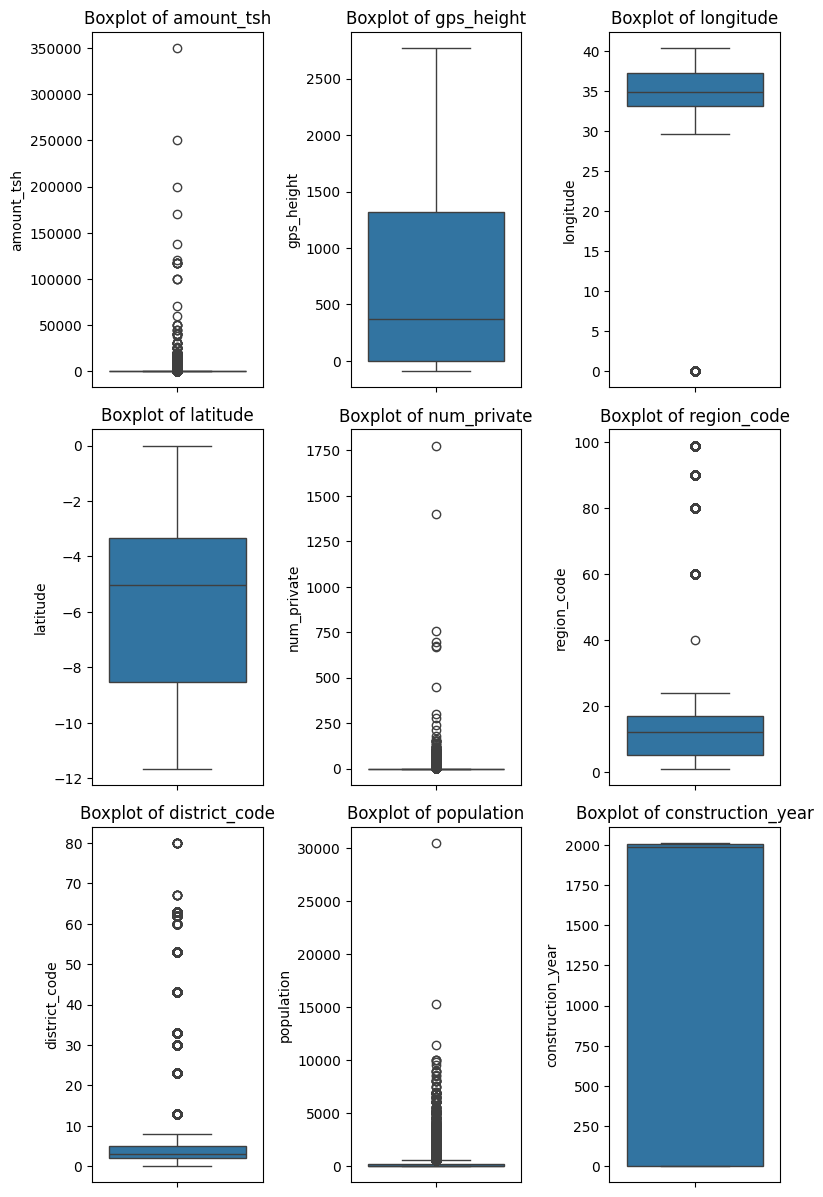

In [ ]:
# Remove 'id' column
numeric_columns = [col for col in numeric_columns if col != 'id']

# Create boxplot distributions of all columns in numeric_columns
plt.figure(figsize=(8, 16))

for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(data=train_df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

# Going Through the Features

Yes, we are going to go through them all because... I'm suppose to?

Aside from `construction_year`, I will follow the order from the data dictionary.

In [ ]:
# Create a function
def feature_countplot(data, feature, hue, hue_order=None, top_n=None):
    """
    Creates a countplot for a specified feature, handling NaN values and
    limiting to top N categories if specified.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    feature (str): The feature to create the countplot for.
    hue (str): The feature for color coding the plot.
    hue_order (list): The order of the hue categories.
    top_n (int, optional): The number of top categories to display.
    """
    # Set the figure size
    plt.figure(figsize=(14, 10))

    # Handle NaN values
    feature_nan = f'{feature}_nan'
    data[feature_nan] = data[feature].fillna('nan')

    if top_n:
        # Get the top N categories by count
        top_categories = data[feature_nan].value_counts().nlargest(top_n).index

        # Filter the dataframe to include only the top N categories
        filtered_data = data[data[feature_nan].isin(top_categories)]
    else:
        filtered_data = data

    # Sort the categories by count
    sorted_order = filtered_data[feature_nan].value_counts().index

    # Create the countplot
    sns.countplot(data=filtered_data, y=feature_nan,
                  hue=hue, hue_order=hue_order,
                  order=sorted_order)

    # Set the title and labels
    title = f'Count of {feature.replace("_", " ").title()} by {hue.replace("_", " ").title()}'
    if top_n:
        title += f' (Top {top_n} Categories Including NaN Values)'
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel(feature.replace("_", " ").title())
    plt.legend(loc='lower right')

    # Show the plot
    plt.show()

# Example usage:
# Assuming train_df is your DataFrame and status_order is defined
# feature_countplot(train_df, 'extraction_type', 'status_group', hue_order=status_order)
# feature_countplot(train_df, 'scheme_name', 'status_group', hue_order=status_order, top_n=20)

### Construction Year

Looked at `construction_year` column and found 0's instead of 'na' values. This affects the distribution, so two options are to impute the year (e.g. mean or median), or convert to a categorical feature.

With ~35% of values in `construction_year`, let's convert to categorical.

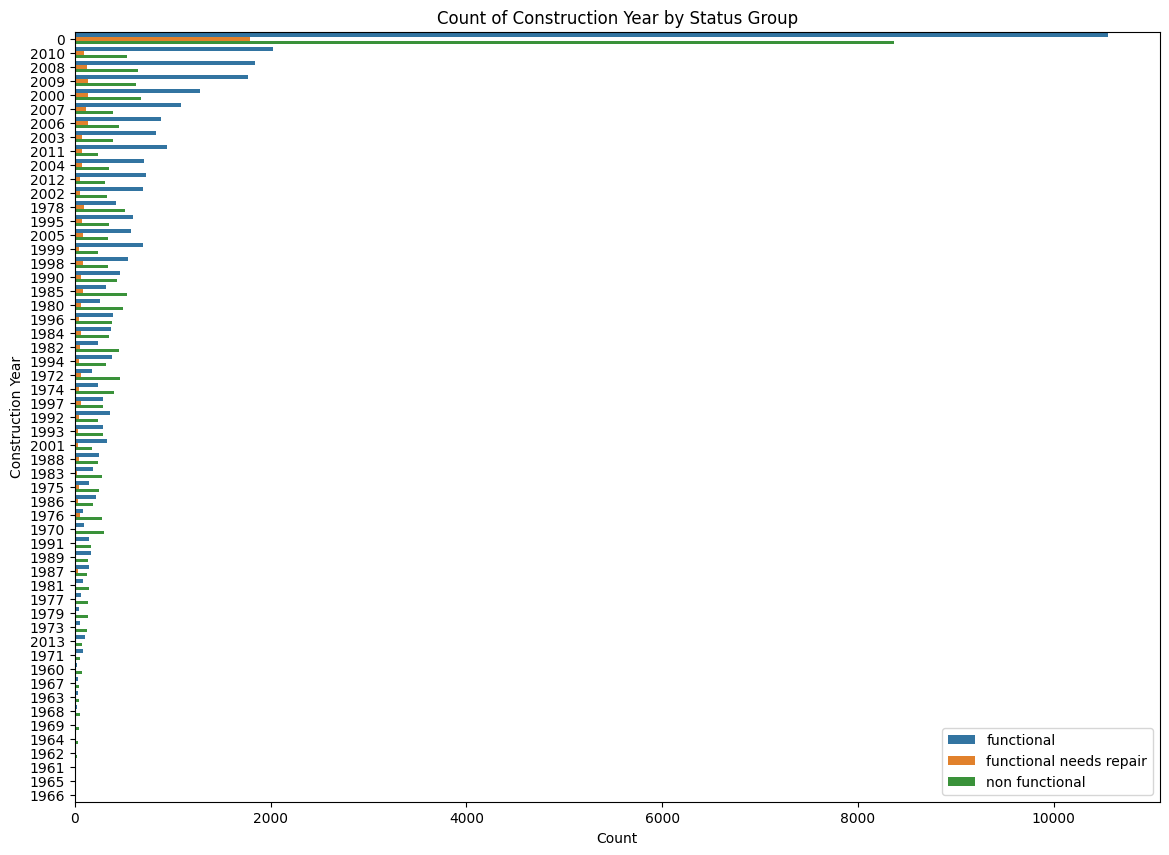

In [ ]:
# Count plot for construction_year
feature_countplot(train_df, 'construction_year', 'status_group', hue_order=status_order)

It's taking forever on my laptop to process the dataset, so we will take a smaller sample.

Let's try 10%.

In [ ]:
# Perform stratified sampling to get 10% of the data
sample_df, _ = train_test_split(
    train_df,
    test_size=0.9,
    stratify=train_df['status_group'],
    random_state=604
)

# Display the shape of the sampled dataframe to verify
sample_df.shape

(5940, 42)

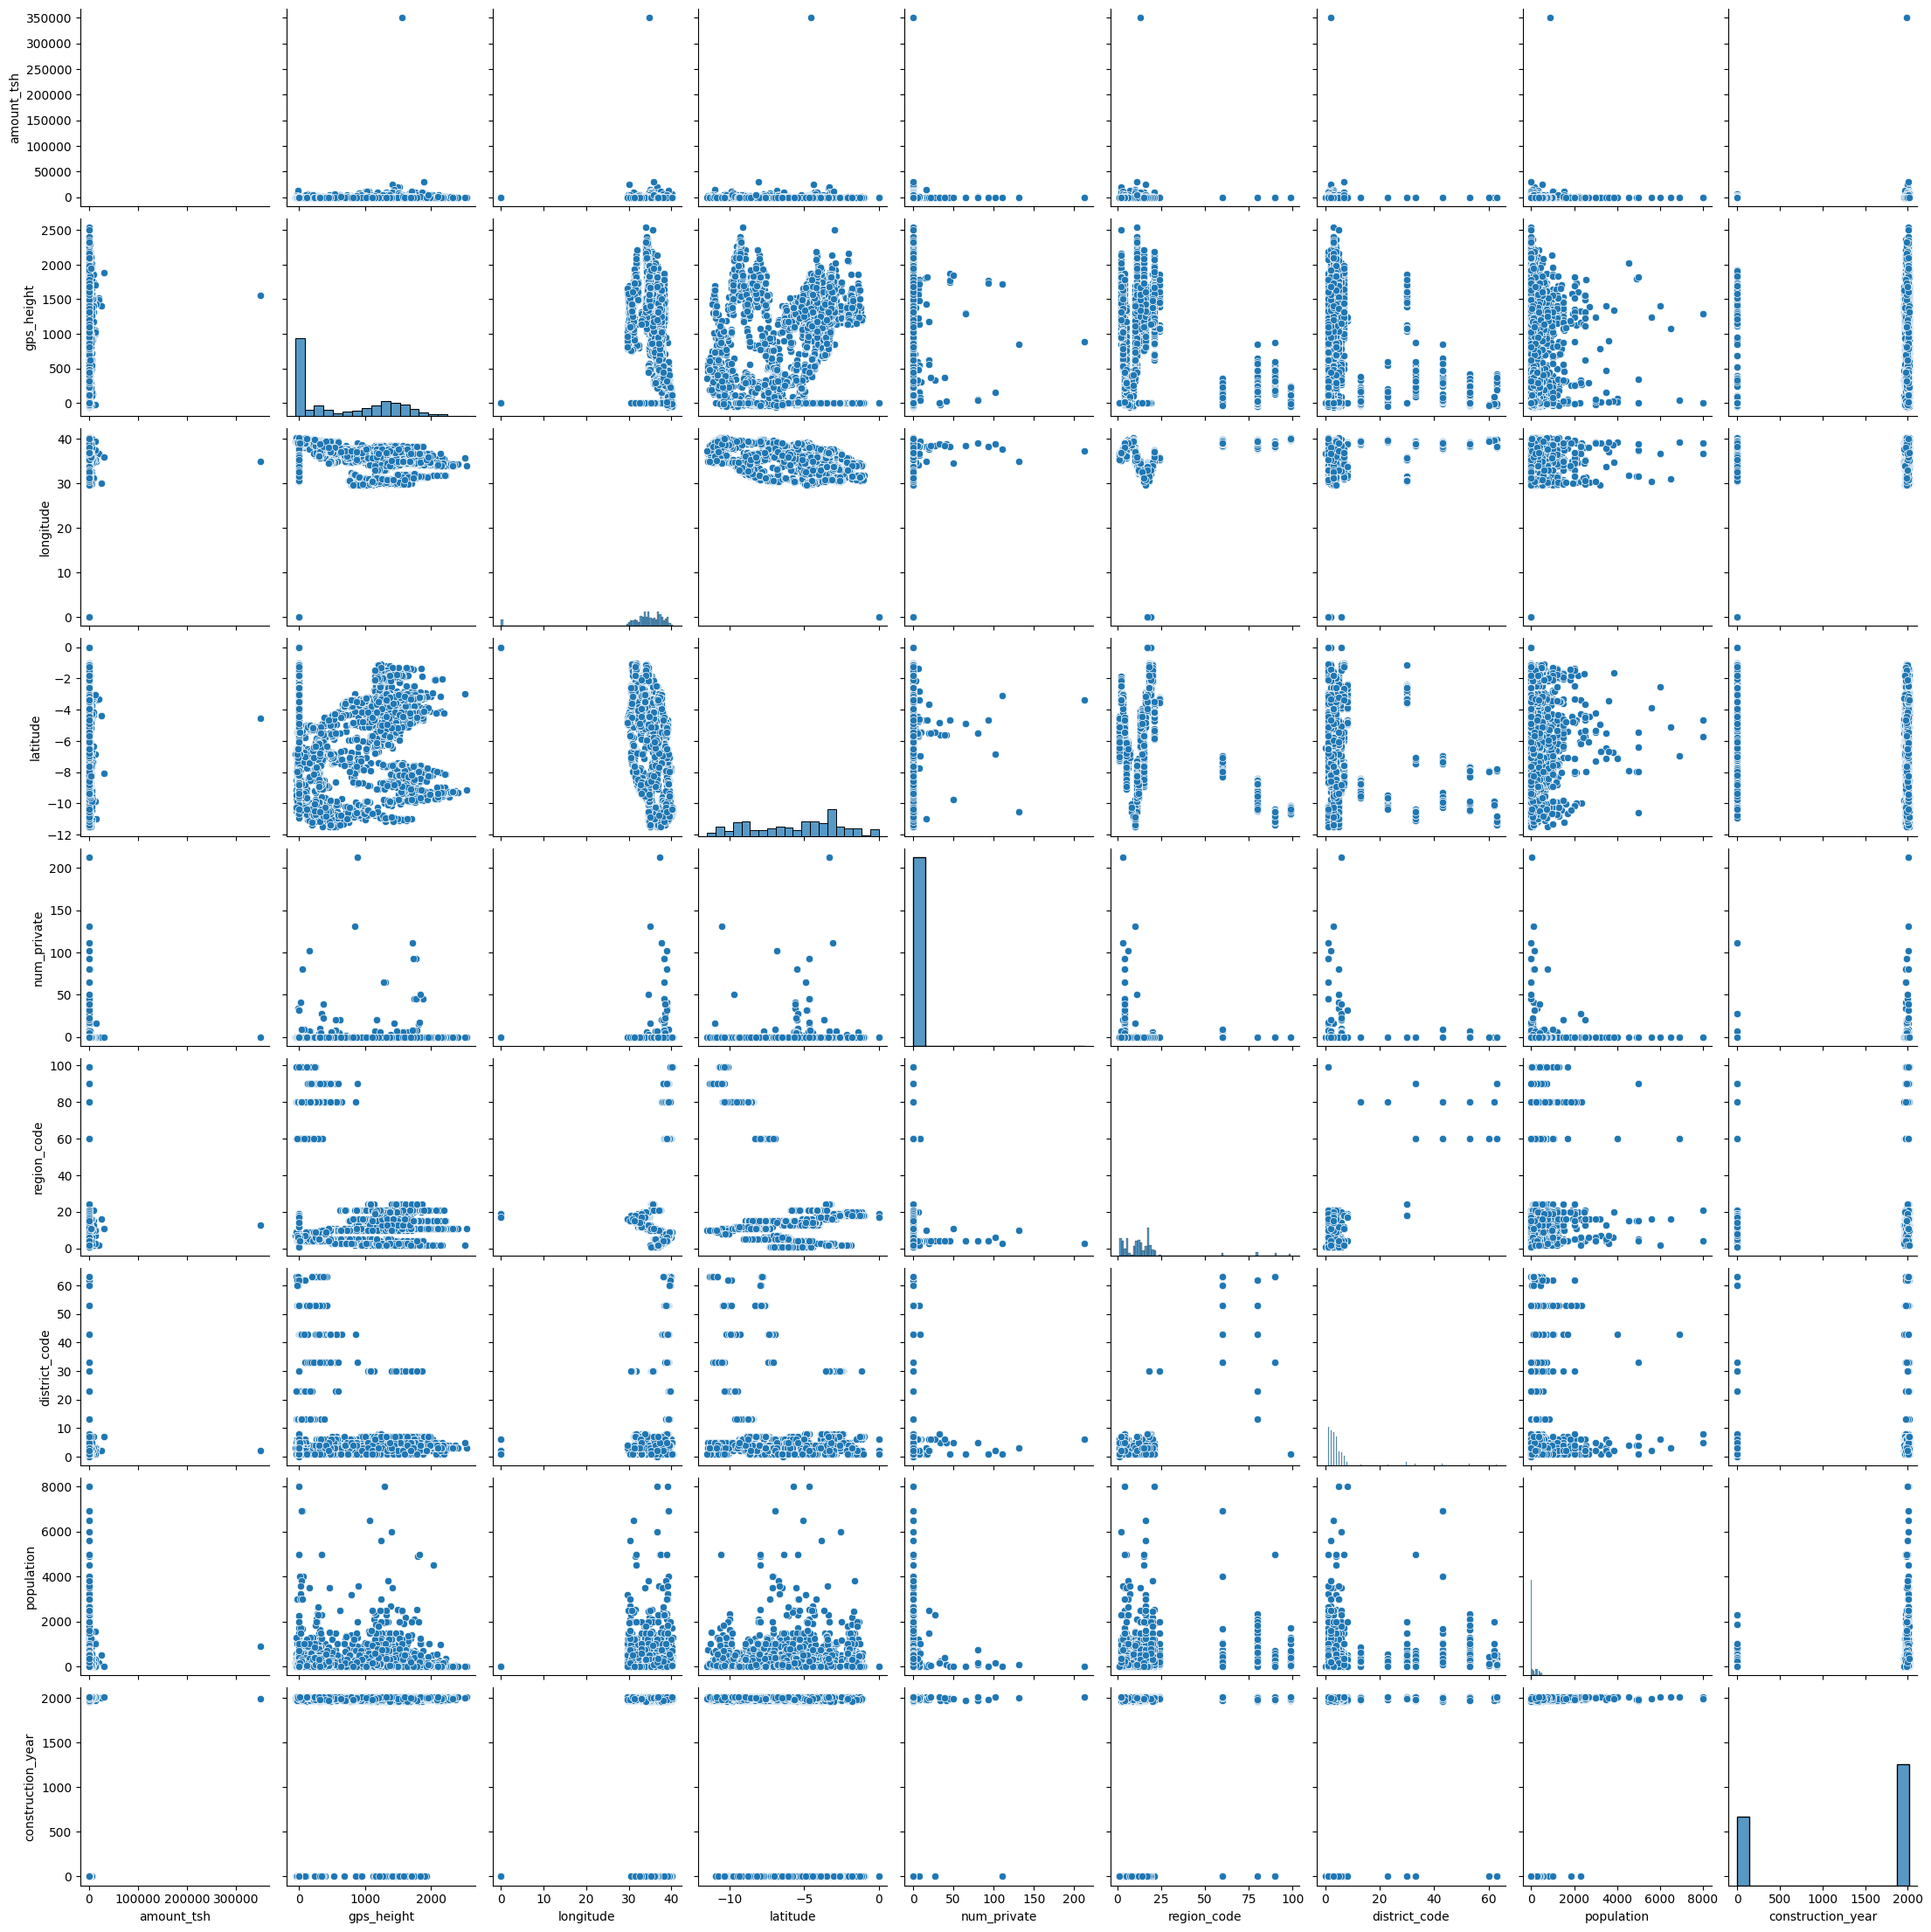

In [ ]:
# Pairplot of numeric_columns (with sample_df otherwise will take forever)
sns.pairplot(sample_df[numeric_columns])
plt.show()

### Total Static Head
`amount_tsh` is interesting because I cannot infer units. For example, the max value is 350,000.

If that was in meters, that would be about 40 times the height of Mount Everest.

The other problem is that there are functional pumps where `amount_tsh` is 0.

In [ ]:
# Maximum value of 'amount_tsh'
train_df['amount_tsh'].max()

350000.0

In [ ]:
# Count the number of times amount_tsh is 0 where status_group is 'functional'
train_df[(train_df['status_group'] == 'functional') & (train_df['amount_tsh'] == 0)].shape[0]

19706

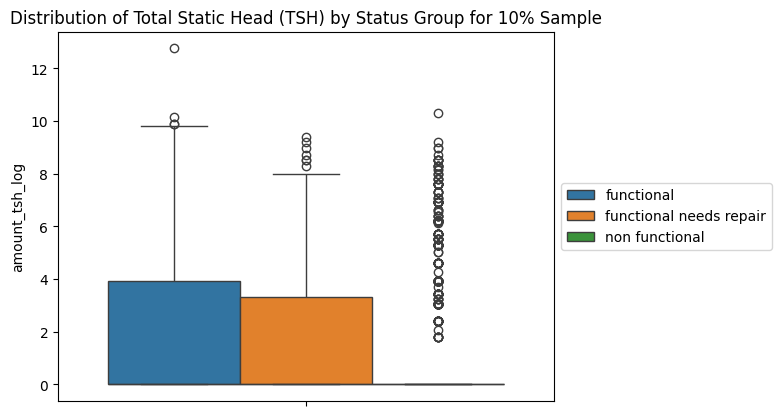

In [ ]:
# Log transform 'amount_tsh' and create a new column 'amount_tsh_log'
sample_df['amount_tsh_log'] = np.log1p(sample_df['amount_tsh'])

# Create a boxplot of the log-transformed 'amount_tsh'
sns.boxplot(data=sample_df, y='amount_tsh_log', hue='status_group')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Total Static Head (TSH) by Status Group for 10% Sample')
plt.show()

### Date Recorded
Date Recorded seems to fall within a 2 year period with dates recorded more at the beginning of each year.

May not be a useful feature.

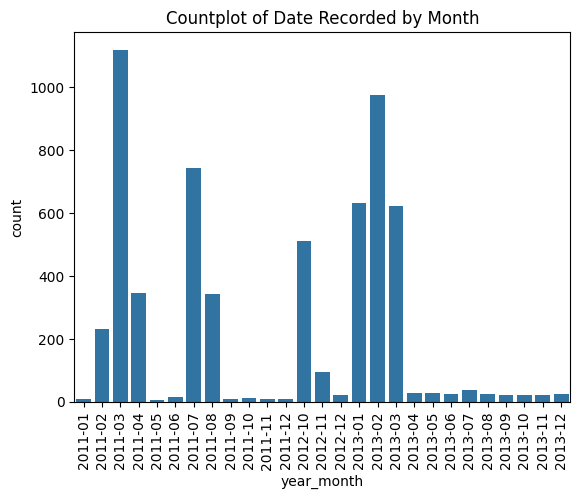

In [ ]:
# Look at 'date_recorded'
# Convert 'date_recorded' to pandas datetime
sample_df['date_recorded'] = pd.to_datetime(sample_df['date_recorded'])

# Extract month and year from 'date_recorded'
sample_df['year_month'] = sample_df['date_recorded'].dt.to_period('M')

# Create a countplot of the timeline by month and sort by date
#plt.figure(figsize=(10, 5))
sns.countplot(data=sample_df, x='year_month', order=sorted(sample_df['year_month'].unique()))
plt.xticks(rotation=90)
plt.title('Countplot of Date Recorded by Month')
plt.show()

### Funder
There appears to be a lot of funders, but most of them are from the Government of Tanzania.

There also appears to be a lot of null values, in addition to '0'. Let's combine them as missing values.

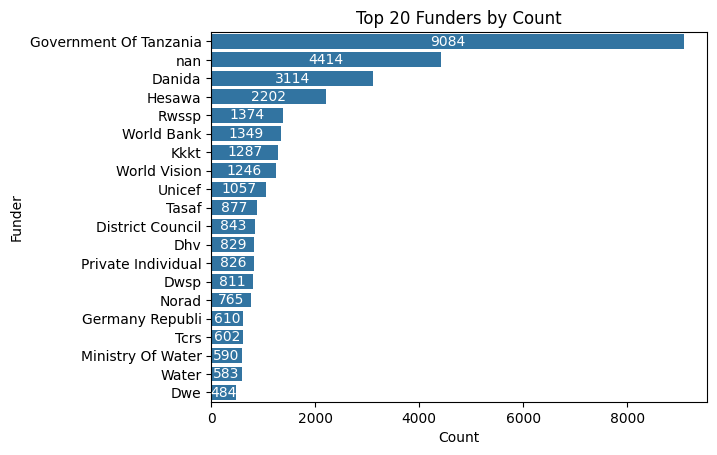

In [ ]:
# Convert '0' to na in 'funder' and fillna with 'na'
train_df['funder'] = train_df['funder'].replace('0', np.nan).fillna('nan')

# Get the top 20 funders by count, including 'na'
top_funders = train_df['funder'].value_counts().head(20)

# Create a bar plot for the top 20 funders
#plt.figure(figsize=(12, 8))
sns.barplot(x=top_funders.values, y=top_funders.index)
plt.title('Top 20 Funders by Count')
plt.xlabel('Count')
plt.ylabel('Funder')

# Annotate the number of funders in the middle of the bar in white
for index, value in enumerate(top_funders.values):
    plt.text(value / 2, index, str(value), color='white', ha='center', va='center')

plt.show()

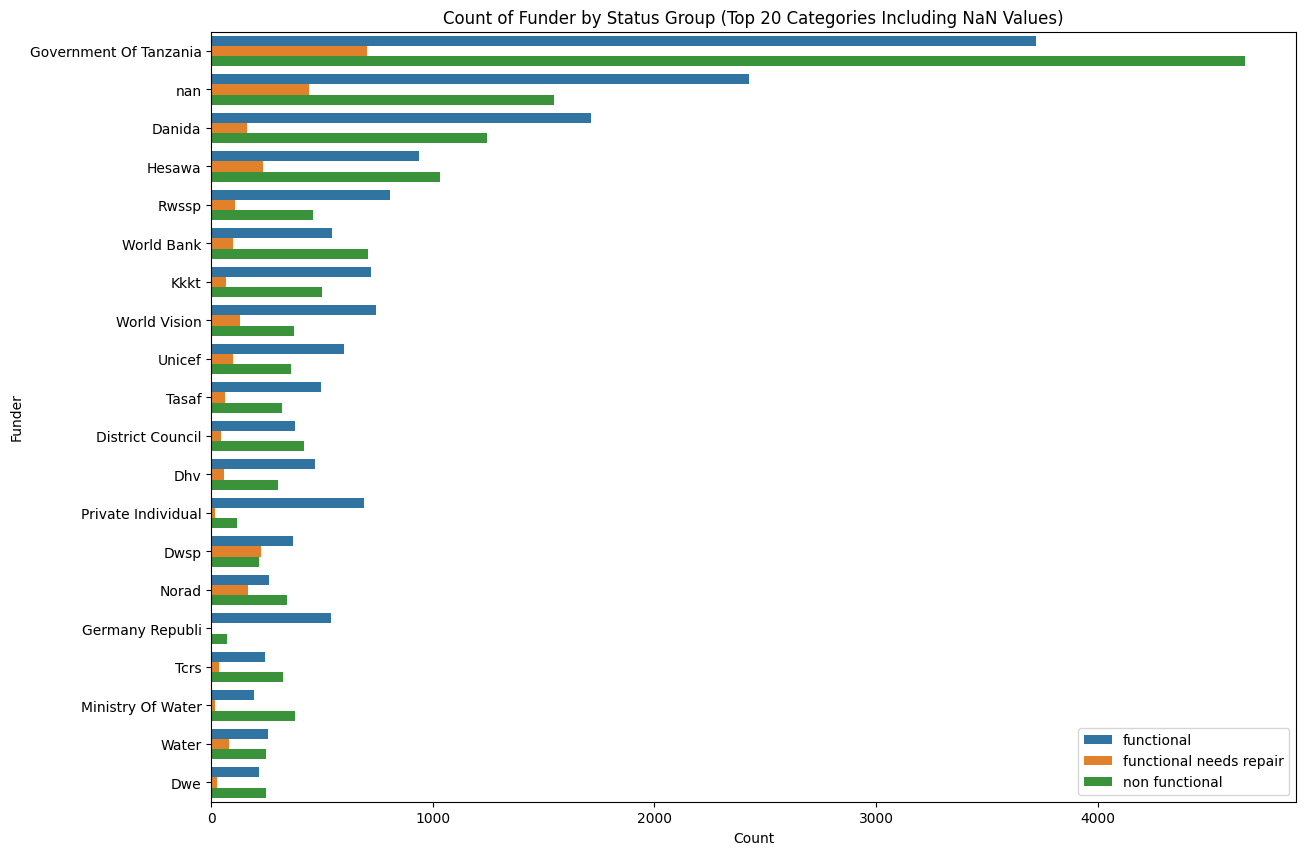

In [ ]:
feature_countplot(
    train_df,
    'funder',
    'status_group',
    hue_order=status_order,
    top_n=20
)

### GPS Height
A quick look at the distribution shows a lot of 0's and some negative values.

This can be appropriate if we assume 0 is at sea level, and negative values are below sea level.

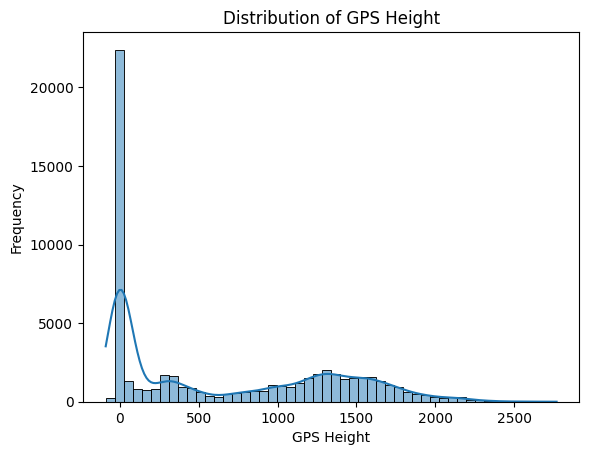

In [ ]:
# Visualize the distribution of GPS height
#plt.figure(figsize=(12, 8))
sns.histplot(train_df['gps_height'], bins=50, kde=True)
plt.title('Distribution of GPS Height')
plt.xlabel('GPS Height')
plt.ylabel('Frequency')

plt.show()

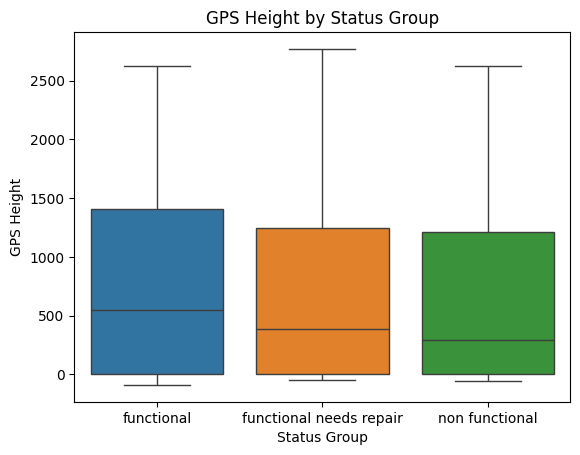

In [ ]:
# Create a boxplot to visualize GPS height by status_group
#plt.figure(figsize=(14, 10))
sns.boxplot(data=train_df, x='status_group', y='gps_height', order=status_order, hue='status_group', hue_order=status_order)
plt.title('GPS Height by Status Group')
plt.xlabel('Status Group')
plt.ylabel('GPS Height')
plt.show()

### Installer

Similar to `funders`. There are missing values and also a '0', so convert to na and chart.

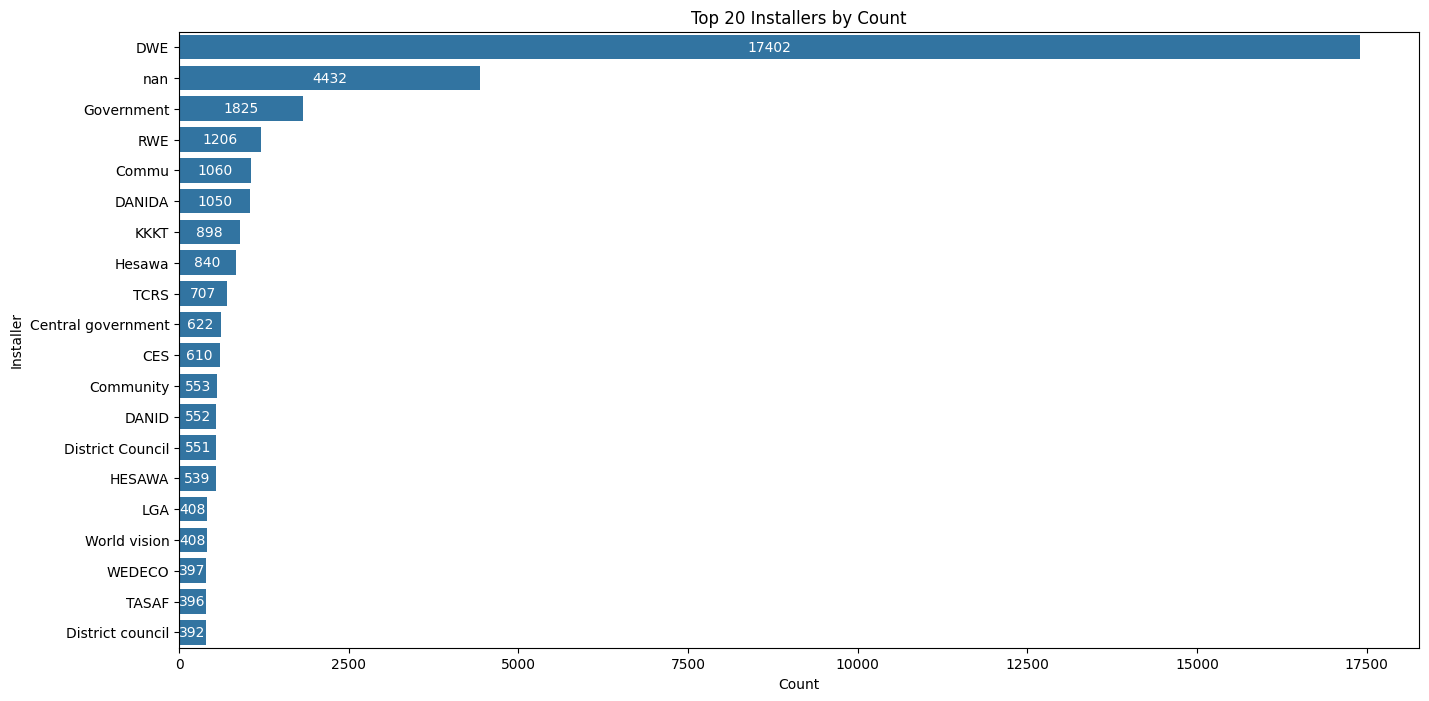

In [ ]:
# Convert '0' to na in 'installer' and fillna with 'nan'
train_df['installer'] = train_df['installer'].replace('0', np.nan).fillna('nan')

# Get the top 10 installers by count, including 'na'
top_installers = train_df['installer'].value_counts().head(20)

# Create a bar plot for the top installers
plt.figure(figsize=(16, 8))
sns.barplot(x=top_installers.values, y=top_installers.index)
plt.title('Top 20 Installers by Count')
plt.xlabel('Count')
plt.ylabel('Installer')

# Annotate the number of installer in the middle of the bar in white
for index, value in enumerate(top_installers.values):
    plt.text(value / 2, index, str(value), color='white', ha='center', va='center')

plt.show()

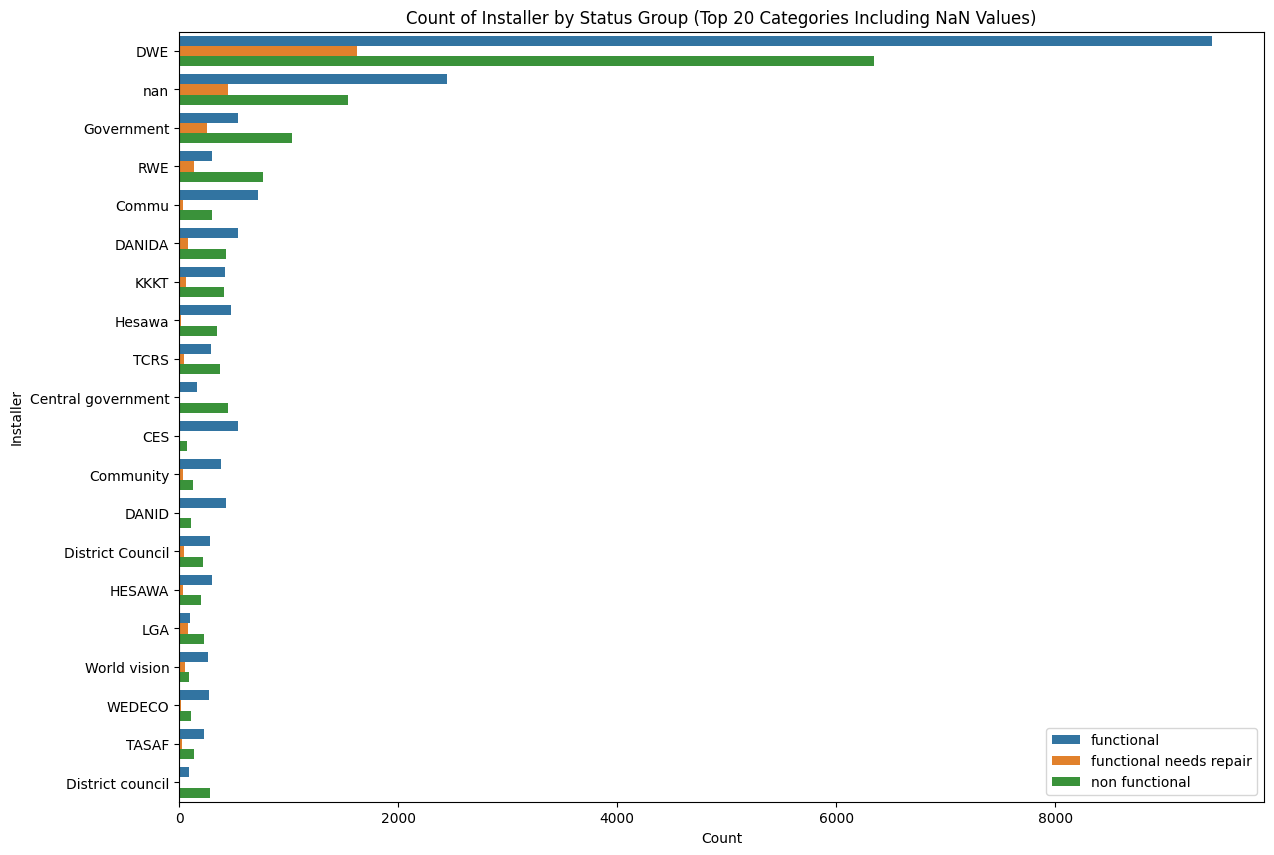

In [ ]:
feature_countplot(
    train_df,
    'installer',
    'status_group',
    hue_order=status_order,
    top_n=20
)

### Longitude & Latitude
Let's try to look at things on a map!

There appear to be 0,0 coordinates, which is in the middle of the Atlantic Ocean.

We will eventually imputed the median values of `longitude` and `latitude` respectively based on `region_code`

In [ ]:
!pip install cartopy

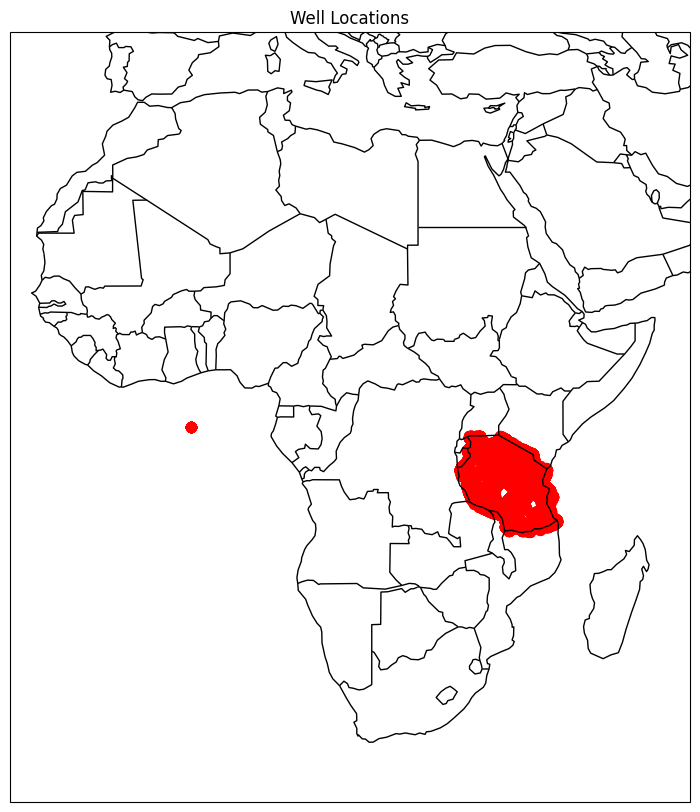

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    train_df,
    geometry=gpd.points_from_xy(train_df['longitude'], train_df['latitude'])
)

# Set up the plot with Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add the Natural Earth feature for country borders
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE)

# Plot your points
ax.scatter(gdf.geometry.x, gdf.geometry.y, color='red', s=50, transform=ccrs.PlateCarree())

# Set the x and y axis limits to zoom into Africa
ax.set_extent([-20, 55, -35, 37])  # Longitude and latitude range for Africa

plt.title('Well Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

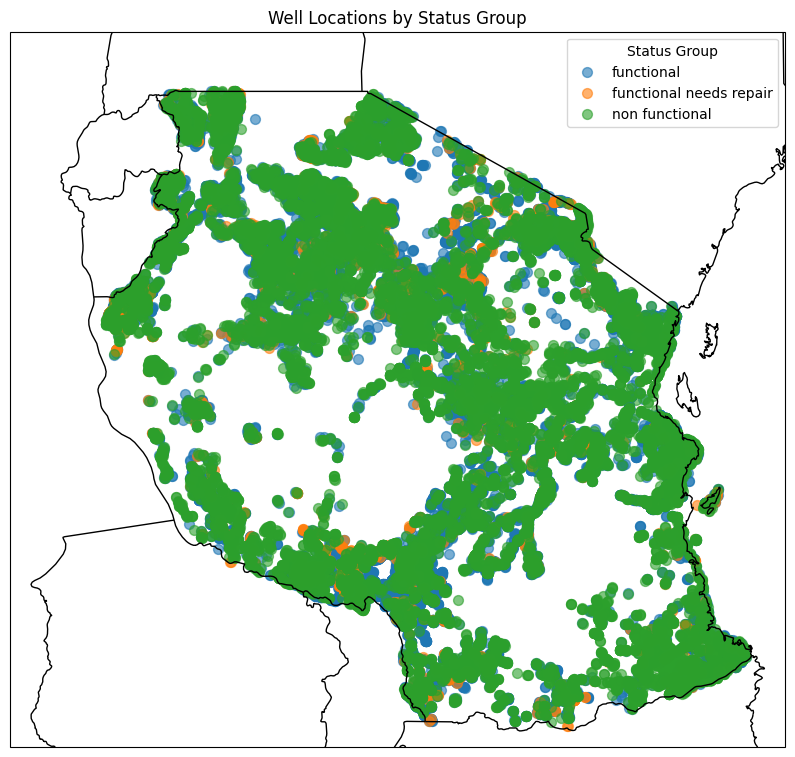

In [ ]:
# Zoom In
# Set up the plot with Cartopy
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Add the Natural Earth features for country borders
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE)

# Define the status groups and assign colors
status_groups = status_order  # Assuming status_order is defined elsewhere
colors = sns.color_palette(None, len(status_groups))

# Plot points with different colors based on 'status_group'
for status, color in zip(status_groups, colors):
    subset = gdf[gdf['status_group'] == status]
    ax.scatter(
        subset.geometry.x,
        subset.geometry.y,
        color=color, s=50,
        label=status,
        alpha=0.6,
        transform=ccrs.PlateCarree()
)

# Set the x and y axis limits to zoom into Africa
ax.set_extent([28, 41,  # Longitude
               -12, 0])  # Latitude

# Add titles and labels
plt.title('Well Locations by Status Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Status Group')

# Show the plot
plt.show()

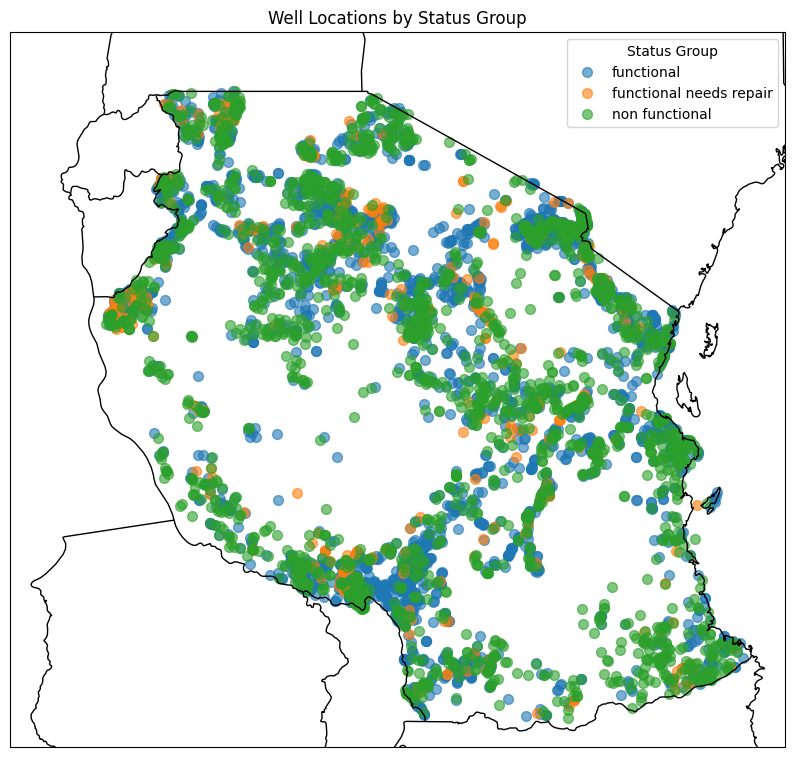

In [ ]:
# Zoom In & Use 'sample_df'

# Create a GeoDataFrame
gdf_sample = gpd.GeoDataFrame(
    sample_df,
    geometry=gpd.points_from_xy(
        sample_df['longitude'], sample_df['latitude'])
)

# Set up the plot with Cartopy
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Add the Natural Earth features for country borders
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE)

# Define the status groups and assign colors
status_groups = status_order  # Assuming status_order is defined elsewhere
colors = sns.color_palette(None, len(status_groups))

# Plot points with different colors based on 'status_group'
for status, color in zip(status_groups, colors):
    subset = gdf_sample[gdf_sample['status_group'] == status]
    ax.scatter(
        subset.geometry.x,
        subset.geometry.y,
        color=color,
        s=50,
        label=status,
        alpha=0.6,
        transform=ccrs.PlateCarree()
)

# Set the x and y axis limits to zoom into Africa
ax.set_extent([28, 41,  # Longitude
               -12, 0])  # Latitude

# Add titles and labels
plt.title('Well Locations by Status Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Status Group')

# Show the plot
plt.show()

In [ ]:
# Find rows where longitude OR latitude in train_df are both 0
zero_coordinates = train_df[(train_df['longitude'] == 0) | (train_df['latitude'] == 0)]

# Display # rows with zero coordinates
zero_coordinates.head()

id  amount_tsh date_recorded                  funder  gps_height  \
21    6091         0.0    2013-02-10                    Dwsp           0   
53   32376         0.0    2011-08-01  Government Of Tanzania           0   
168  72678         0.0    2013-01-30                     Wvt           0   
177  56725         0.0    2013-01-17             Netherlands           0   
253  13042         0.0    2012-10-29                  Hesawa           0   

      installer  longitude      latitude                 wpt_name  \
21          DWE        0.0 -2.000000e-08                 Muungano   
53   Government        0.0 -2.000000e-08                   Polisi   
168         WVT        0.0 -2.000000e-08             Wvt Tanzania   
177         DWE        0.0 -2.000000e-08  Kikundi Cha Wakina Mama   
253         DWE        0.0 -2.000000e-08                Kwakisusi   

     num_private  ... quantity_group                source  \
21             0  ...        unknown          shallow well   
53             0  ...            dry           machine dbh   
168            0  ...       seasonal  rainwater harvesting   
177            0  ...         enough          shallow well   
253            0  ...   insufficient          shallow well   

              source_type  source_class              waterpoint_type  \
21           shallow well   groundwater                    hand pump   
53               borehole   groundwater  communal standpipe multiple   
168  rainwater harvesting       surface           communal standpipe   
177          shallow well   groundwater                        other   
253          shallow well   groundwater                    hand pump   

    waterpoint_type_group             status_group  construction_year_nan  \
21              hand pump               functional                      0   
53     communal standpipe           non functional                      0   
168    communal standpipe               functional                      0   
177                 other           non functional                      0   
253             hand pump  functional needs repair                      0   

                 funder_nan installer_nan  
21                     Dwsp           DWE  
53   Government Of Tanzania    Government  
168                     Wvt           WVT  
177             Netherlands           DWE  
253                  Hesawa           DWE  

[5 rows x 44 columns]

### Waterpoint Name `wpt_name`

From ChatGPT 4o: A waterpoint is a designated location where water is made available for public use, typically in rural or peri-urban areas. These points are crucial for communities that do not have direct access to water within their homes.

Probably not a useful feature (but model score dropped when removed)

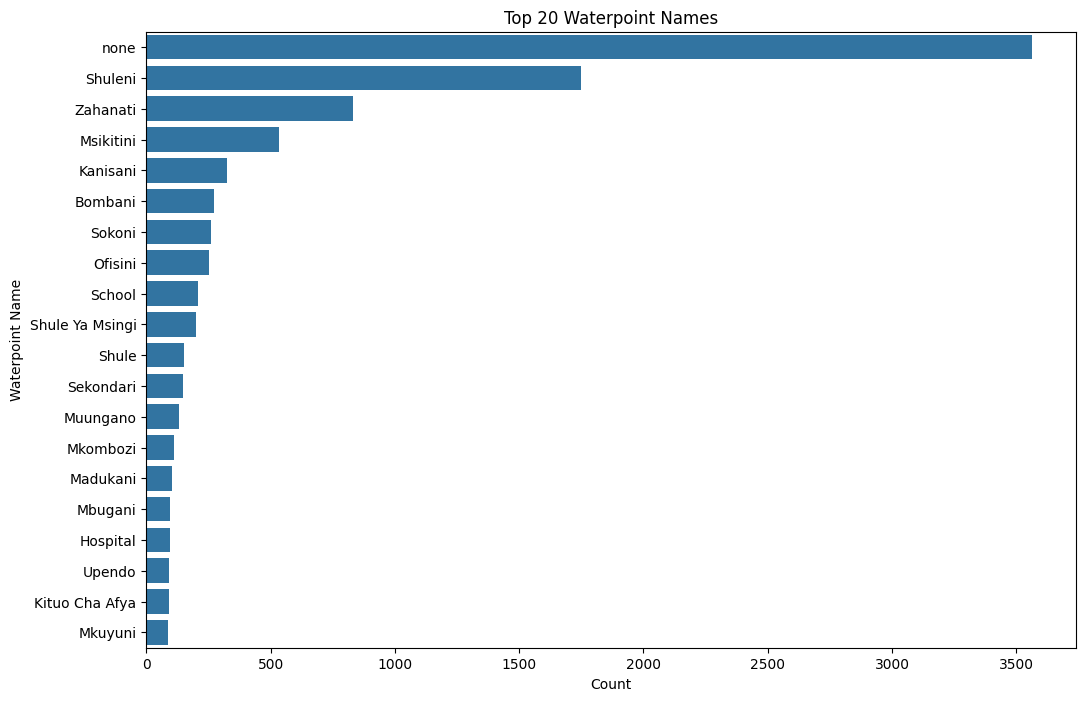

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Count the occurrences of each waterpoint name
wpt_name_counts = train_df['wpt_name'].value_counts().head(20)

# Create a bar plot
sns.barplot(x=wpt_name_counts.values, y=wpt_name_counts.index)

# Set the title and labels
plt.title('Top 20 Waterpoint Names')
plt.xlabel('Count')
plt.ylabel('Waterpoint Name')

# Show the plot
plt.show()

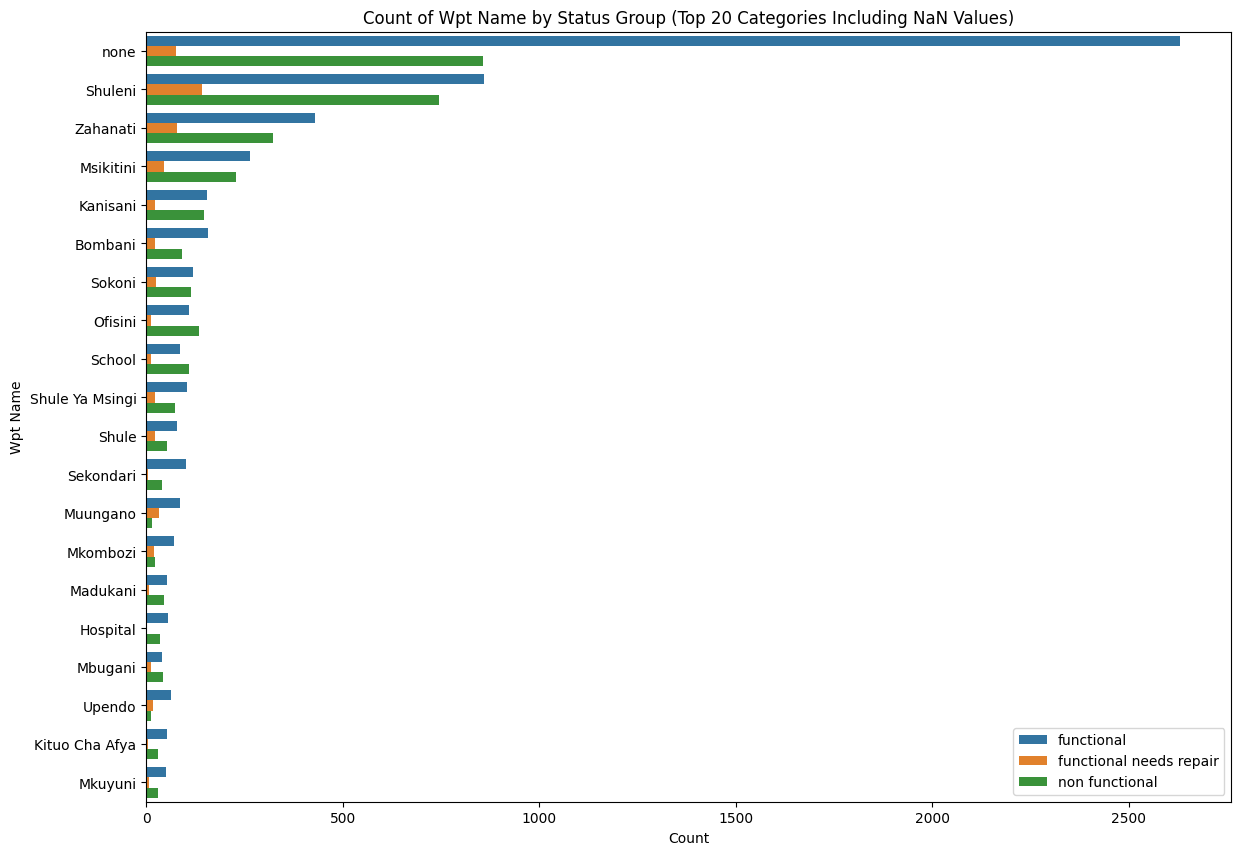

In [ ]:
feature_countplot(
    train_df,
    'wpt_name',
    'status_group',
    hue_order=status_order,
    top_n=20
)

### `num_private`?

Mostly 0s, and some other random numbers. With no other information, we will drop this column for now.

In [ ]:
train_df['num_private'].value_counts()

num_private
0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: count, Length: 65, dtype: int64

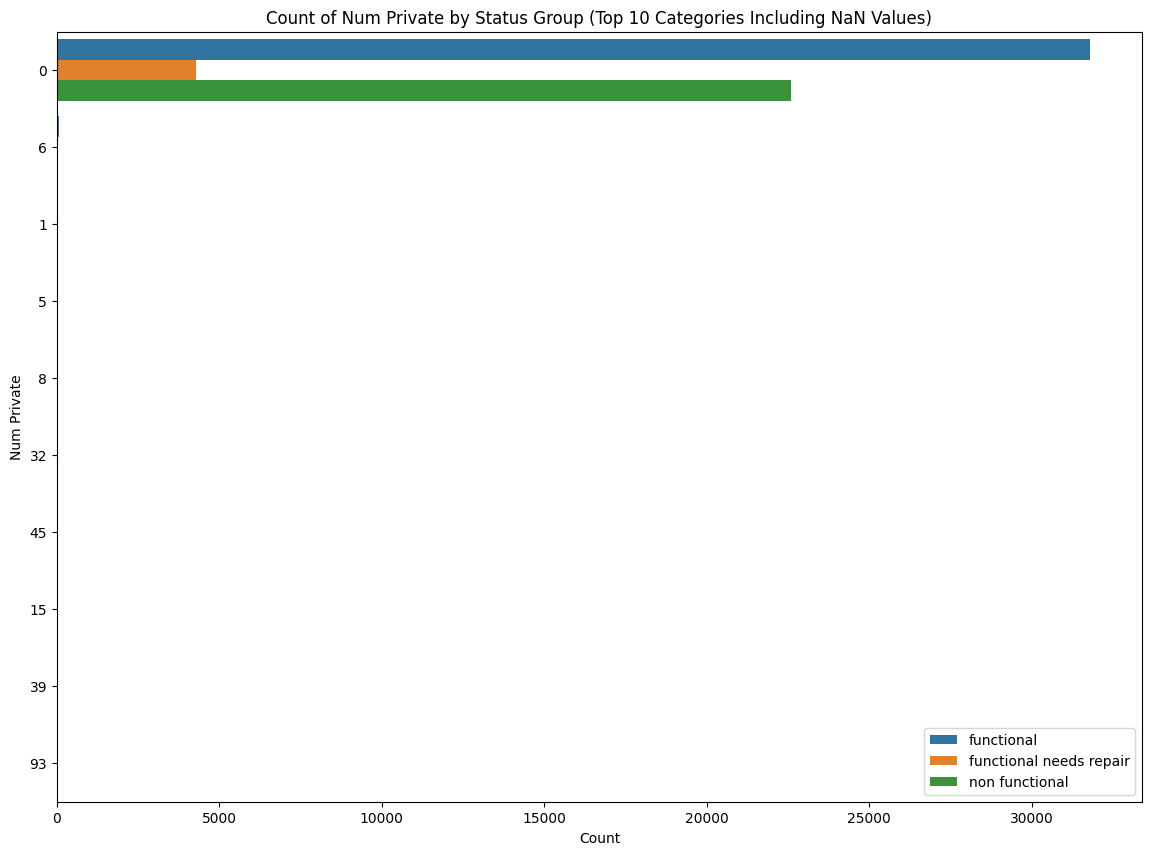

In [ ]:
feature_countplot(
    train_df,
    'num_private',
    'status_group',
    hue_order=status_order,
    top_n=10
)

### Geographic Locations
- `basin` - Geographic water basin
    - 9 categories
- `subvillage` - Geographic location
    - Some subvillages only contain a single letter or number, but not a big deal. Missing values as well, but we can leave them.
- `region` - Geographic location
- `region_code` - Geographic location (coded)
    - Perform categorical encoding so there won't be numerical pattern matching (i.e. Region 2 > Region 1)
- `district_code` - Geographic location (coded)
    - Perform categorical encoding
- `lga` - Geographic location
- `ward` - Geographic location

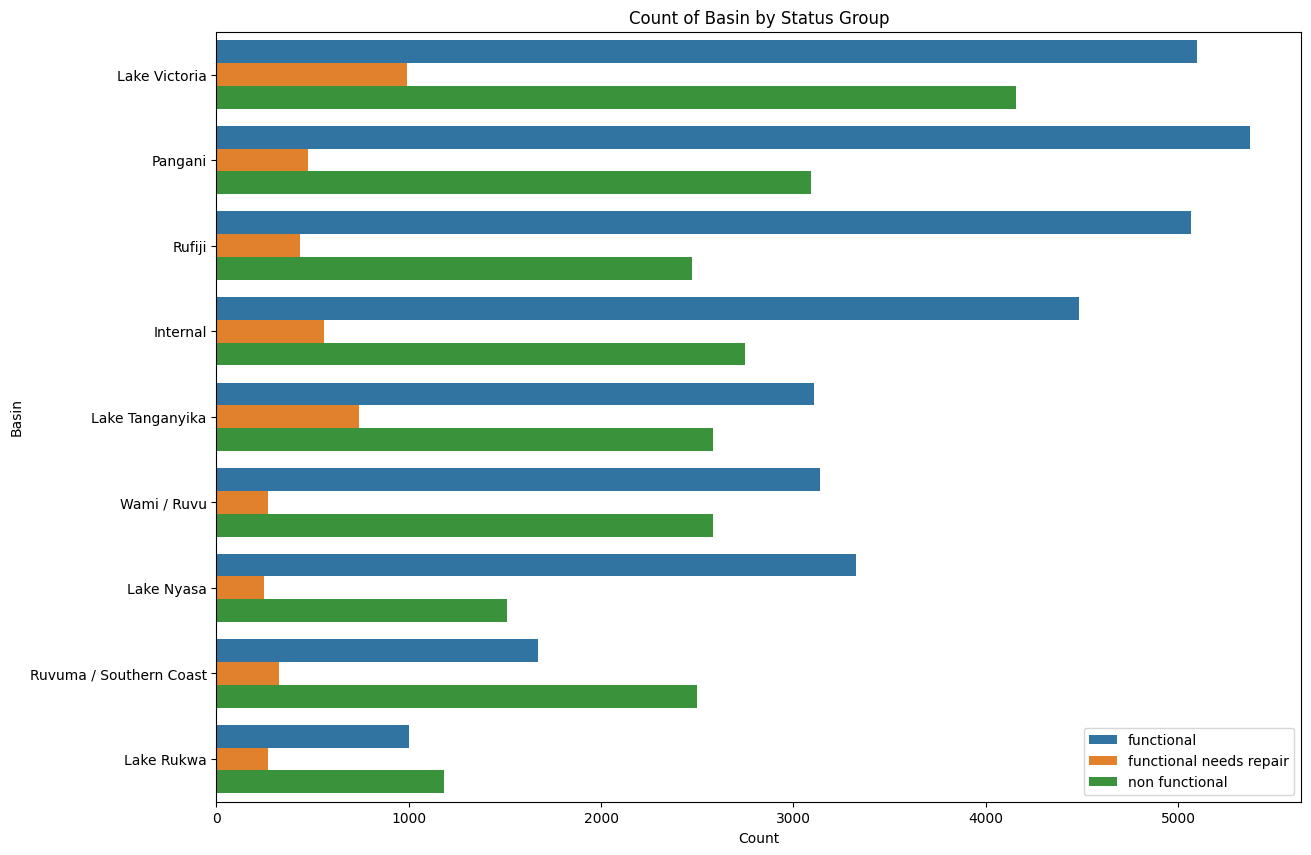

In [ ]:
feature_countplot(
    train_df,
    'basin',
    'status_group',
    hue_order=status_order
)

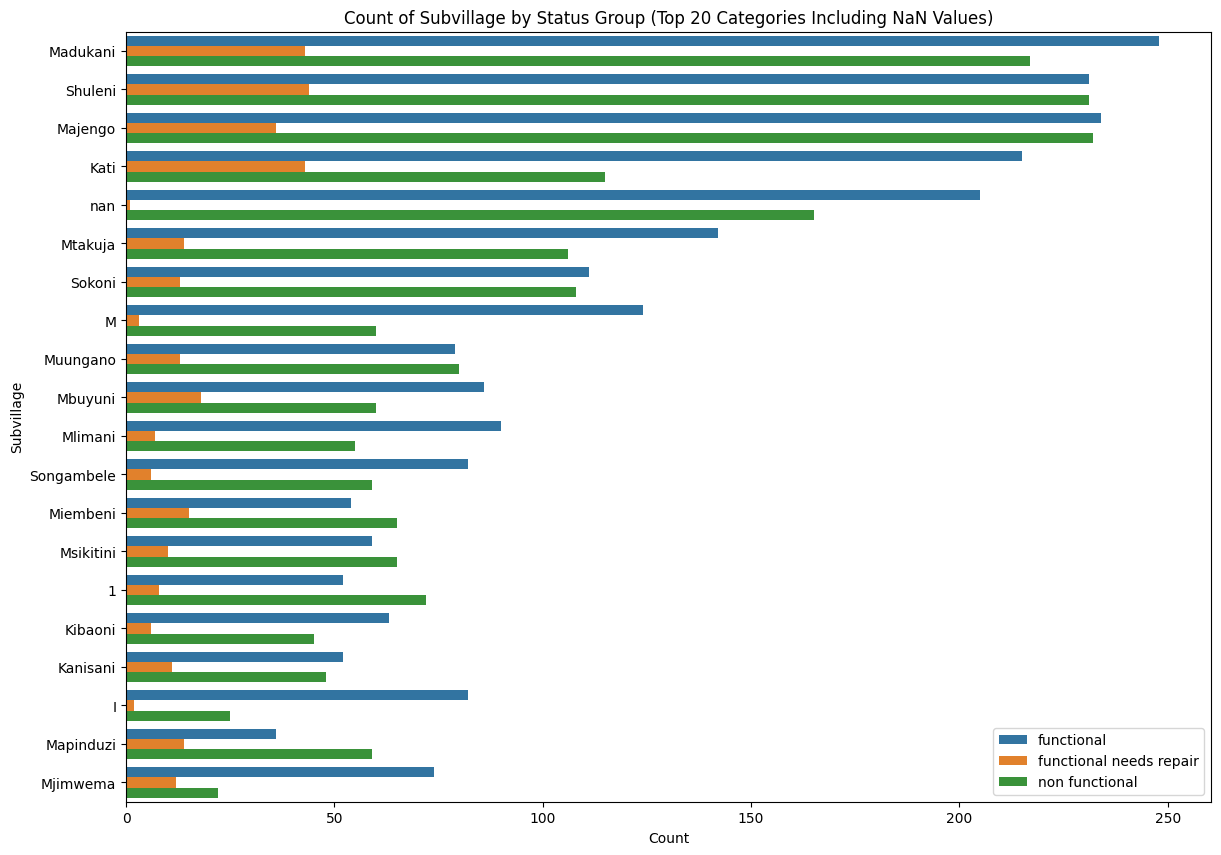

In [ ]:
feature_countplot(
    train_df,
    'subvillage',
    'status_group',
    hue_order=status_order,
    top_n=20
)

In [ ]:
# Find subvillages that only contain 1 letter
one_letter_subvillages = train_df[train_df['subvillage'].str.len() == 1]['subvillage'].unique()

# Display the result
one_letter_subvillages

array(['J', 'I', 'M', 'S', 'K', 'L', '1', 'U', 'T', 'N', 'C', 'F', 'A',
       'G', 'W', 'P', 'R', 'O', 'Q', 'B'], dtype=object)

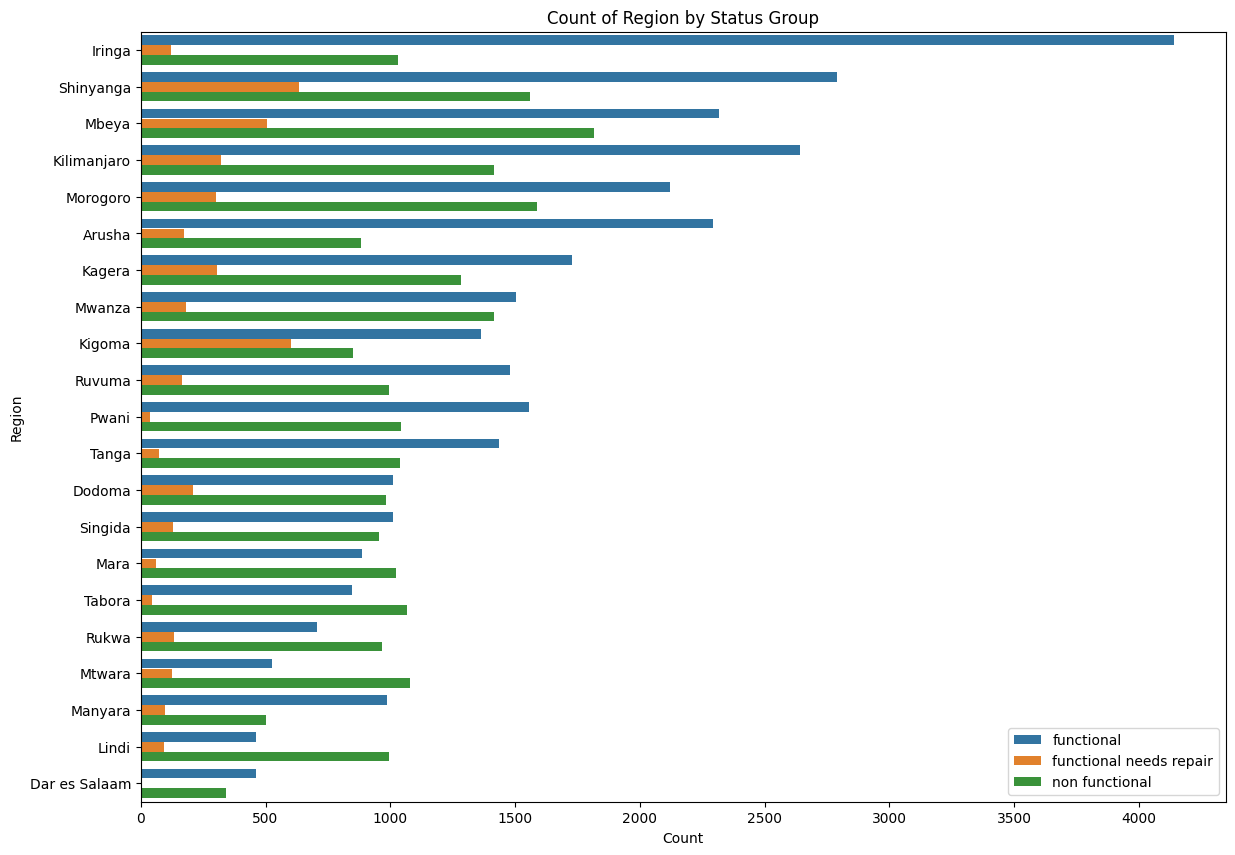

In [ ]:
feature_countplot(
    train_df,
    'region',
    'status_group',
    hue_order=status_order
)

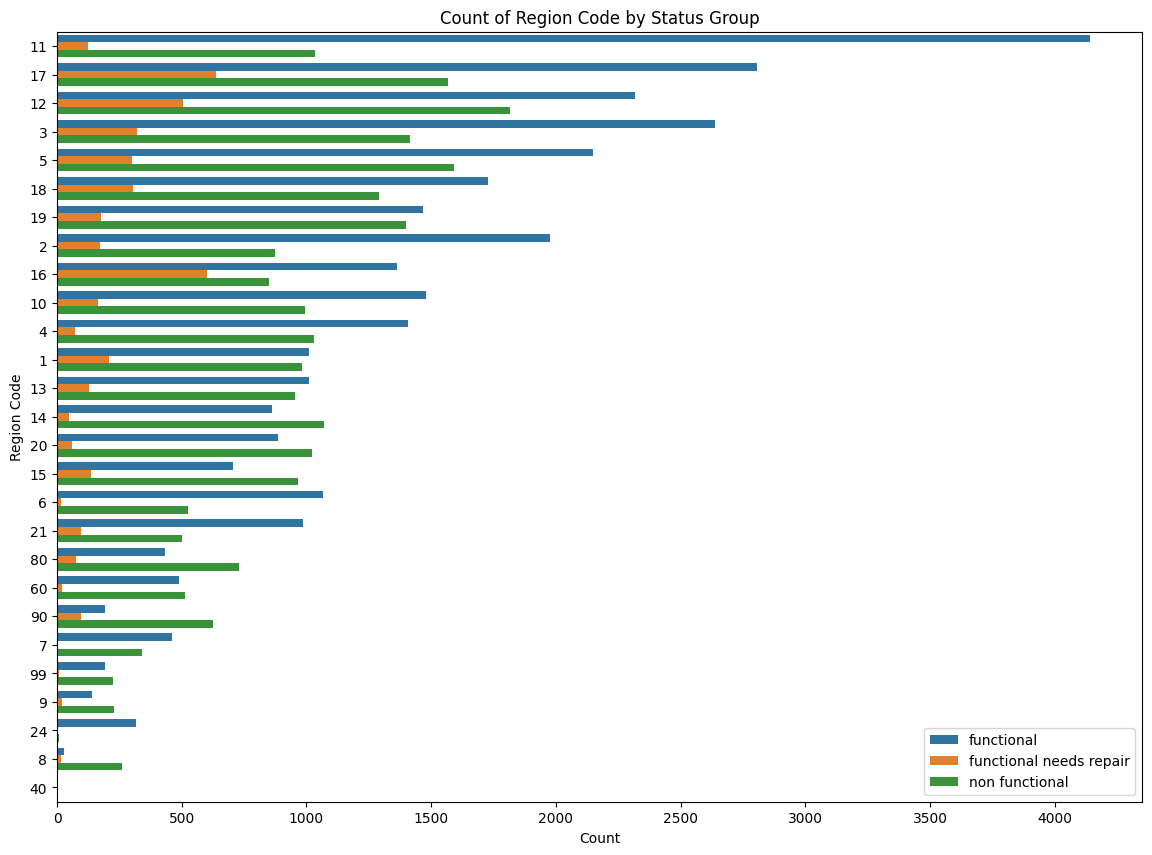

In [ ]:
feature_countplot(
    train_df,
    'region_code',
    'status_group',
    hue_order=status_order
)

In [ ]:
feature_countplot(
    train_df,
    'district_code',
    'status_group',
    hue_order=status_order
)

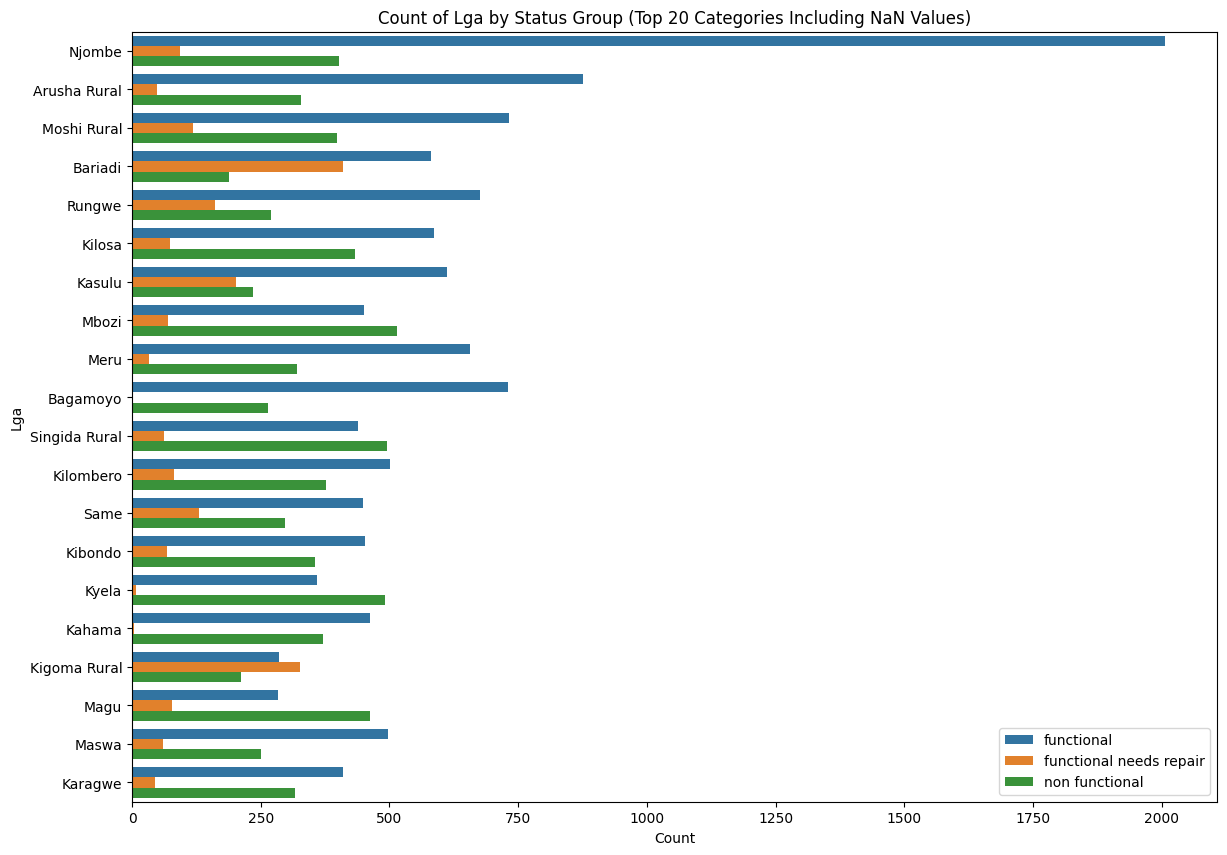

In [ ]:
feature_countplot(
    train_df,
    'lga',
    'status_group',
    hue_order=status_order,
    top_n=20
)

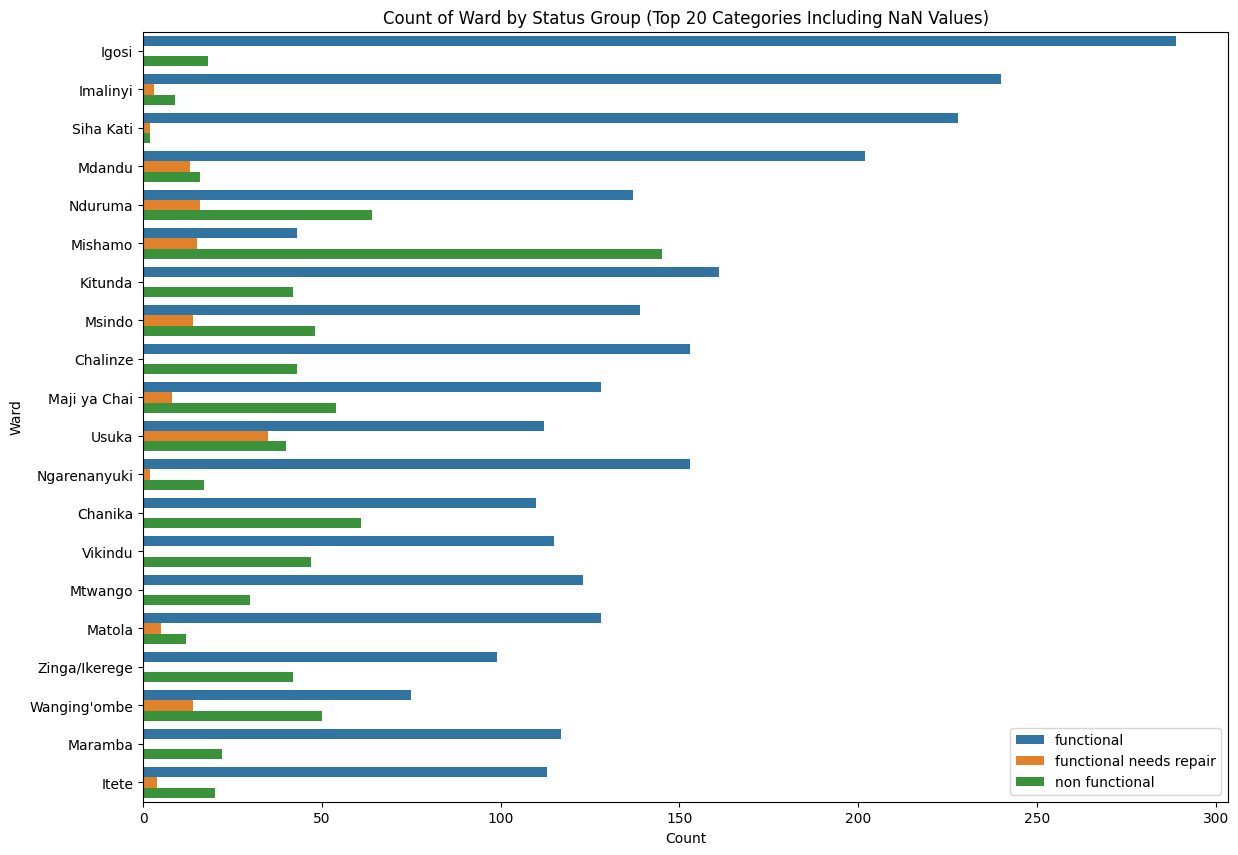

In [ ]:
feature_countplot(
    train_df,
    'ward',
    'status_group',
    hue_order=status_order,
    top_n=20
)

## Additional Features

- `population` - Population around the well
    - log transform to `population_log` if necessary
- `public_meeting` - True/False **missing values**
- `recorded_by` - Group entering this row of data
    - Only one group, so remove feature
- `scheme_management` - Who operates the waterpoint **missing values**
- `scheme_name` - Who operates the waterpoint **missing values**
- `permit` - If the waterpoint is permitted **missing values**
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `extraction_type_class` - The kind of extraction the waterpoint uses
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed

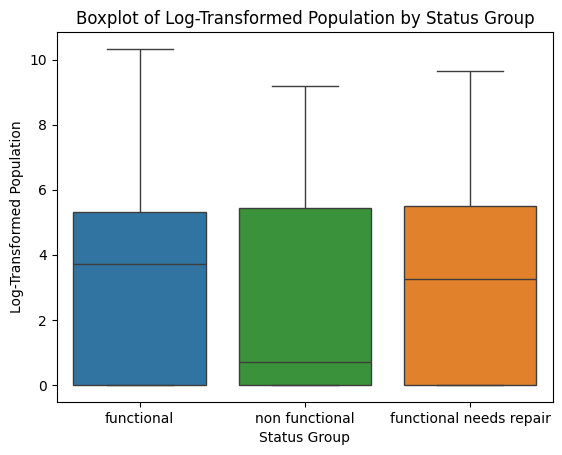

In [ ]:
# Log transform the 'population' column
train_df['population_log'] = np.log1p(train_df['population'])

# Create a box plot for 'population_log' by 'status_group'
sns.boxplot(data=train_df, x='status_group', y='population_log',
            hue='status_group', hue_order=status_order)

# Set the title and labels
plt.title('Boxplot of Log-Transformed Population by Status Group')
plt.xlabel('Status Group')
plt.ylabel('Log-Transformed Population')

# Show the plot
plt.show()

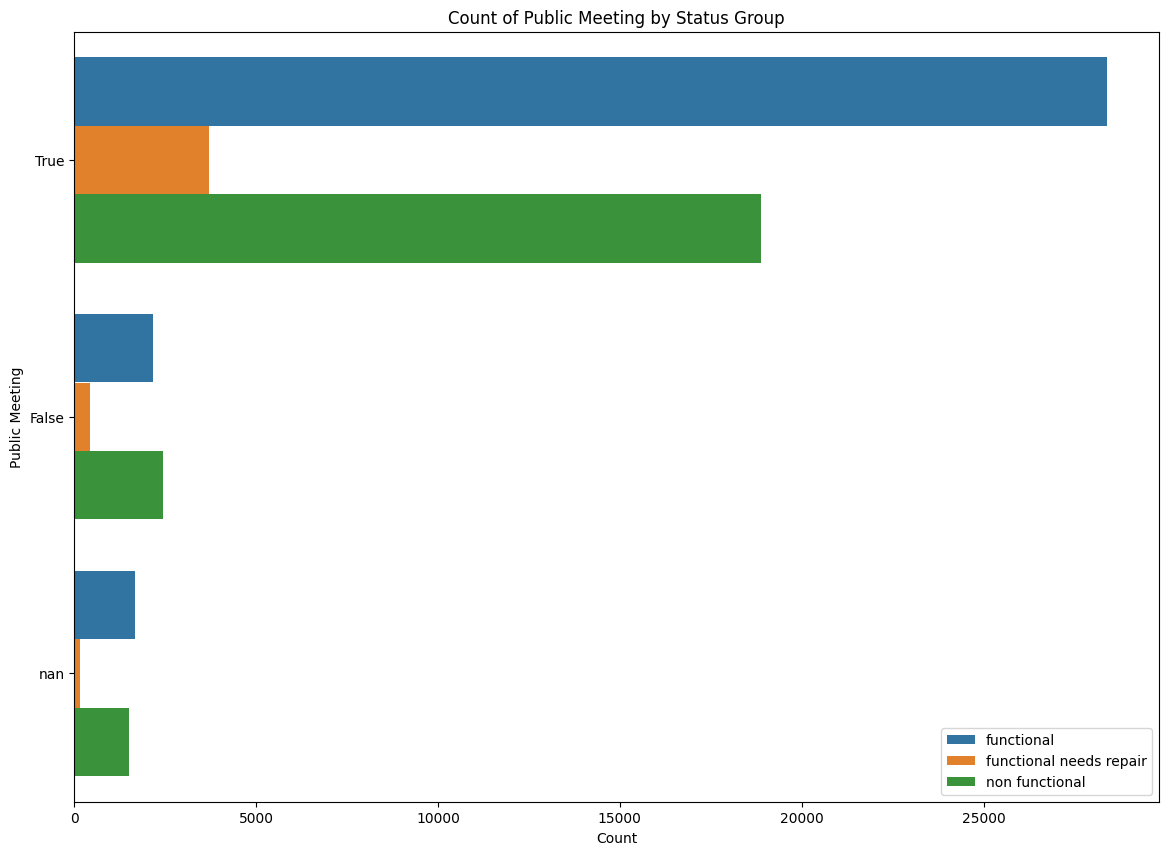

In [ ]:
feature_countplot(
    train_df,
    'public_meeting',
    'status_group',
    hue_order=status_order
)

In [ ]:
# Only one group recording data; remove feature
train_df['recorded_by'].value_counts()

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

In [ ]:
feature_countplot(
    train_df,
    'scheme_management',
    'status_group',
    hue_order=status_order,
)

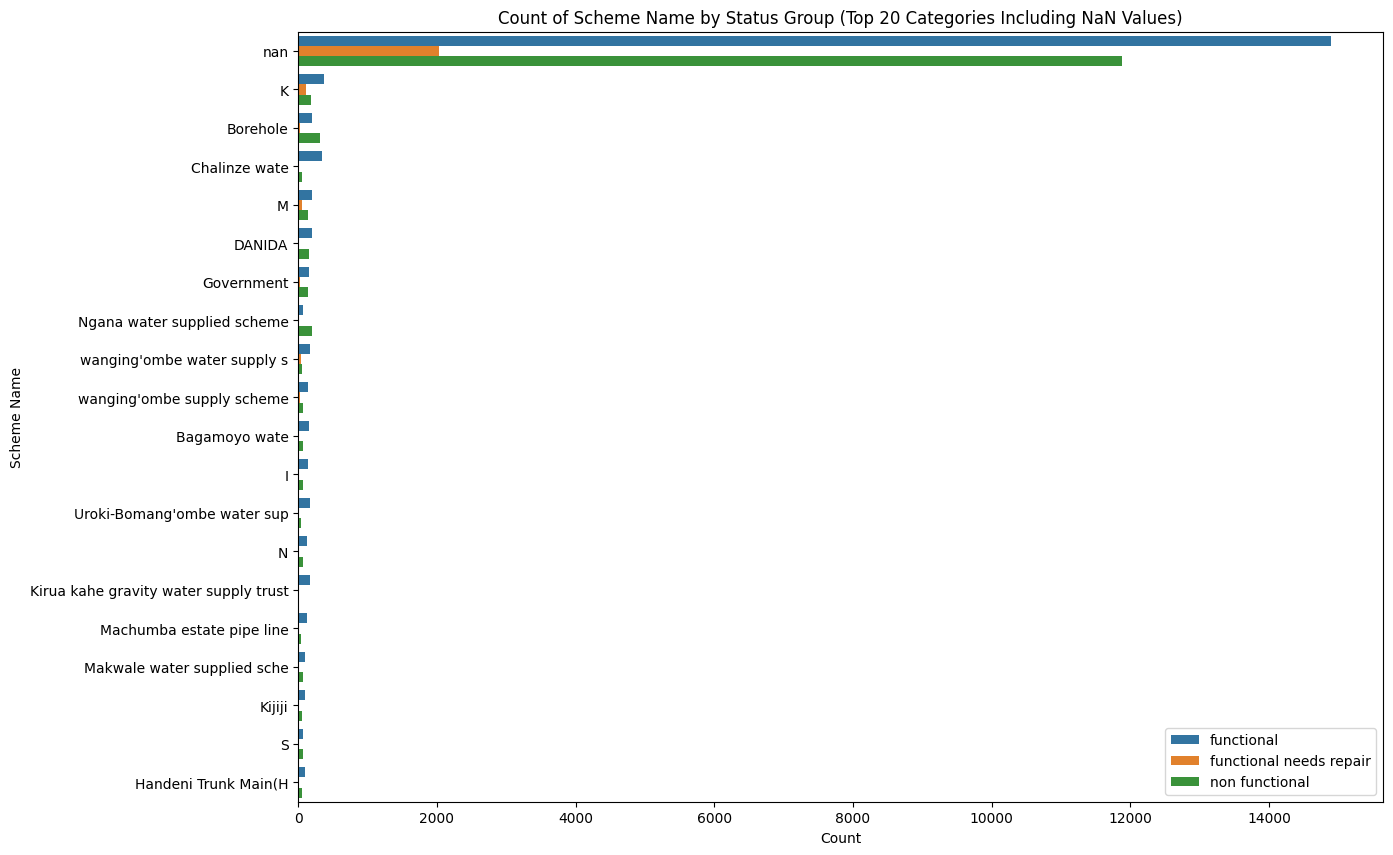

In [ ]:
feature_countplot(
    train_df,
    'scheme_name',
    'status_group',
    hue_order=status_order,
    top_n=20
)

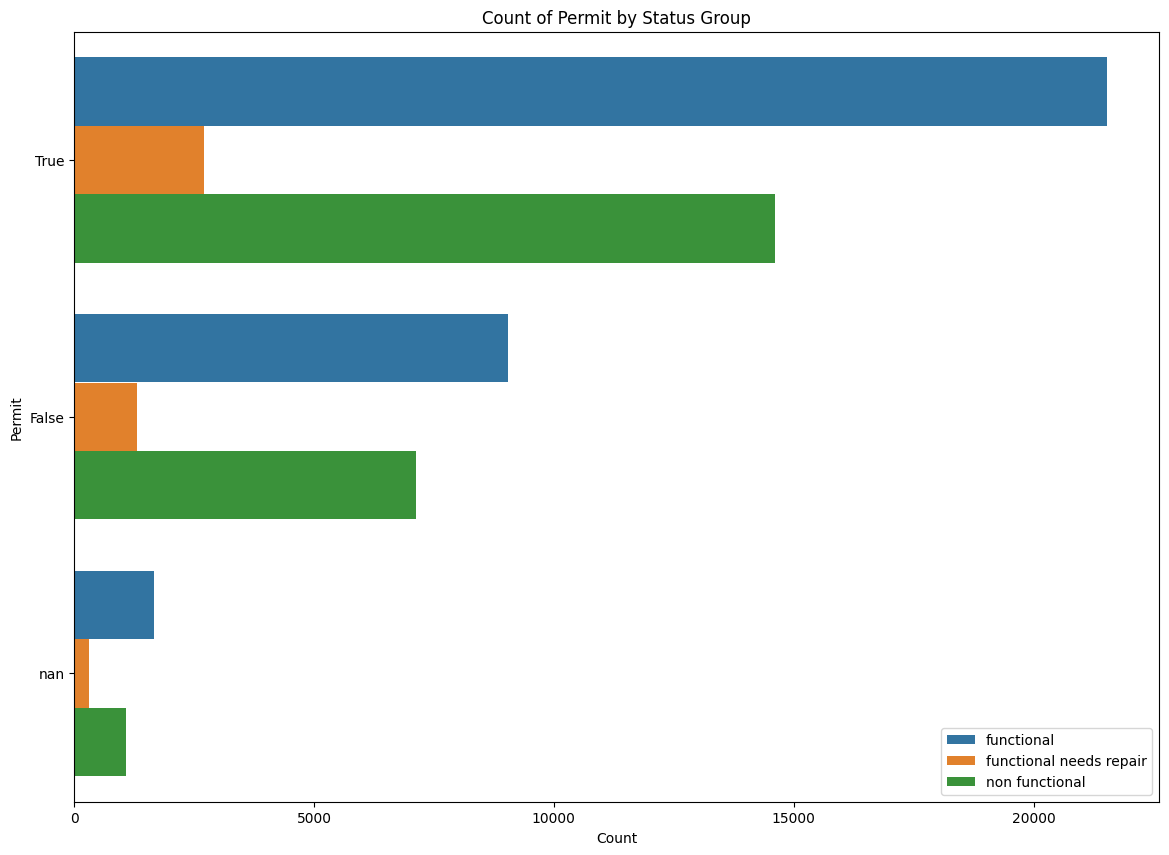

In [ ]:
feature_countplot(
    train_df,
    'permit',
    'status_group',
    hue_order=status_order
)

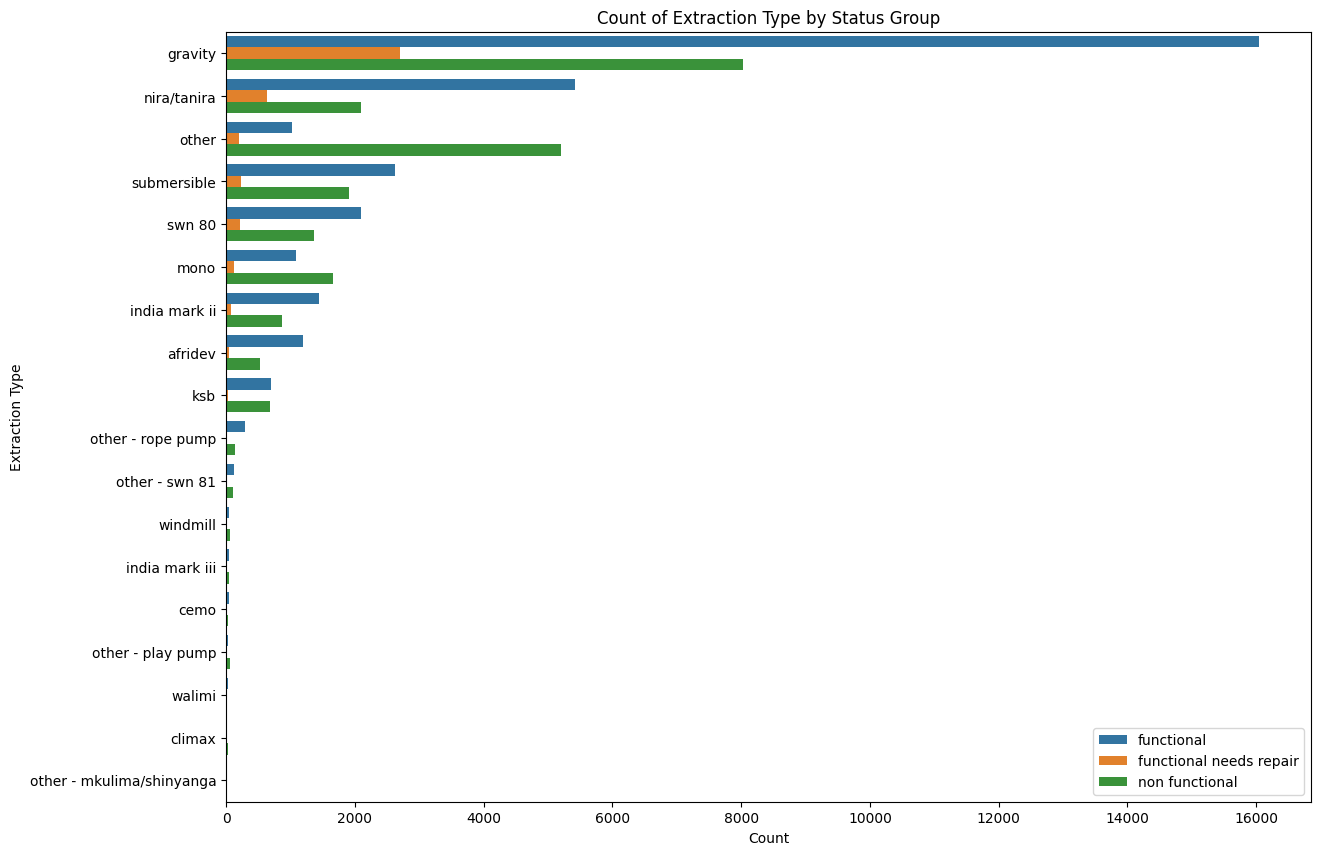

In [ ]:
feature_countplot(
    train_df,
    'extraction_type',
    'status_group',
    hue_order=status_order,
)

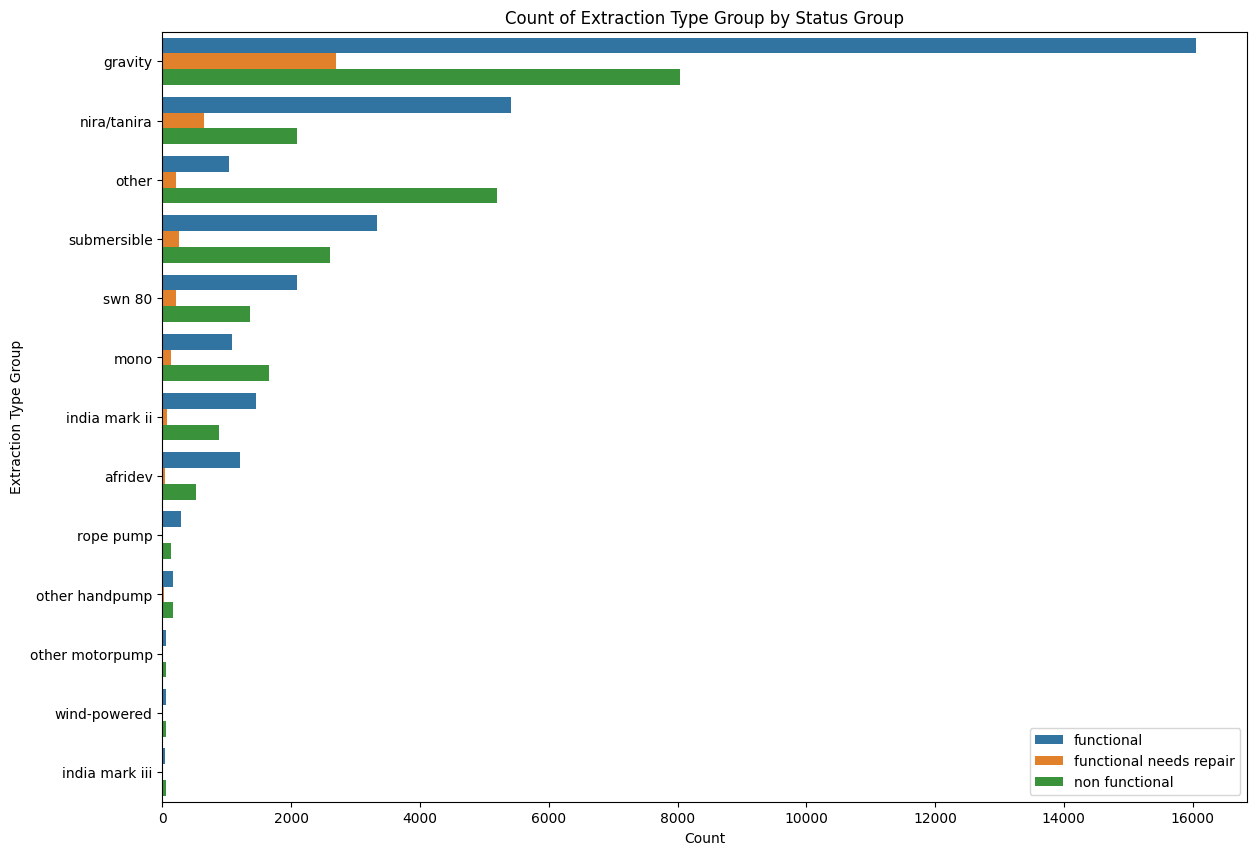

In [ ]:
feature_countplot(
    train_df,
    'extraction_type_group',
    'status_group',
    hue_order=status_order,
)

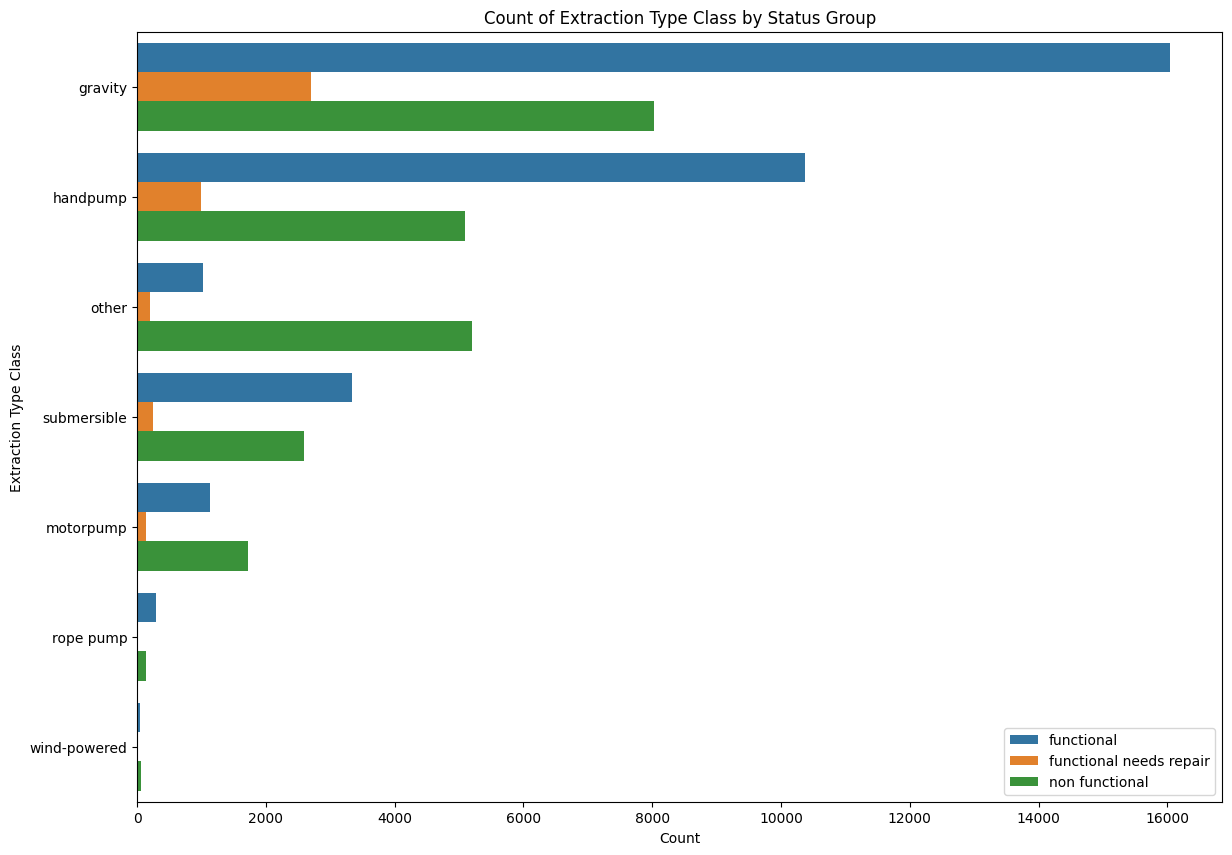

In [ ]:
feature_countplot(
    train_df,
    'extraction_type_class',
    'status_group',
    hue_order=status_order,
)

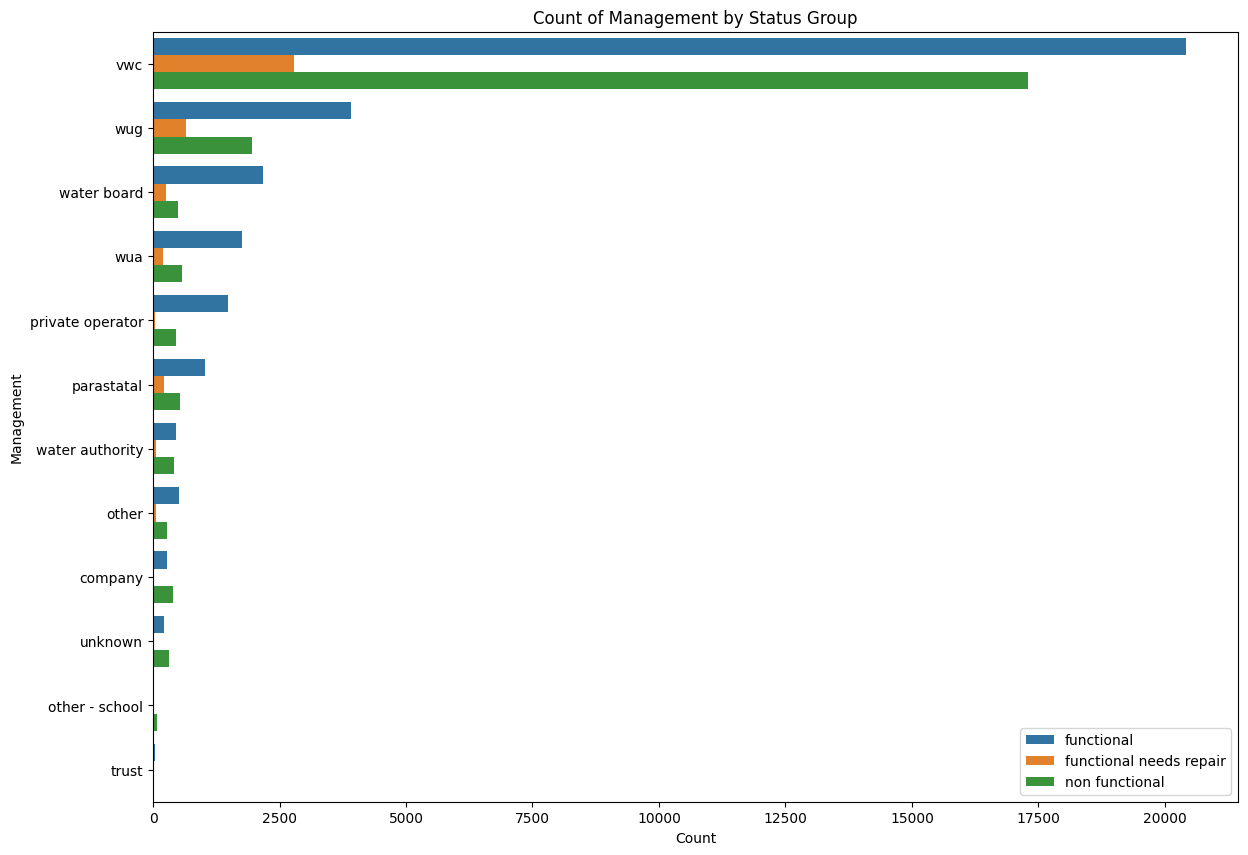

In [ ]:
feature_countplot(
    train_df,
    'management',
    'status_group',
    hue_order=status_order,
)

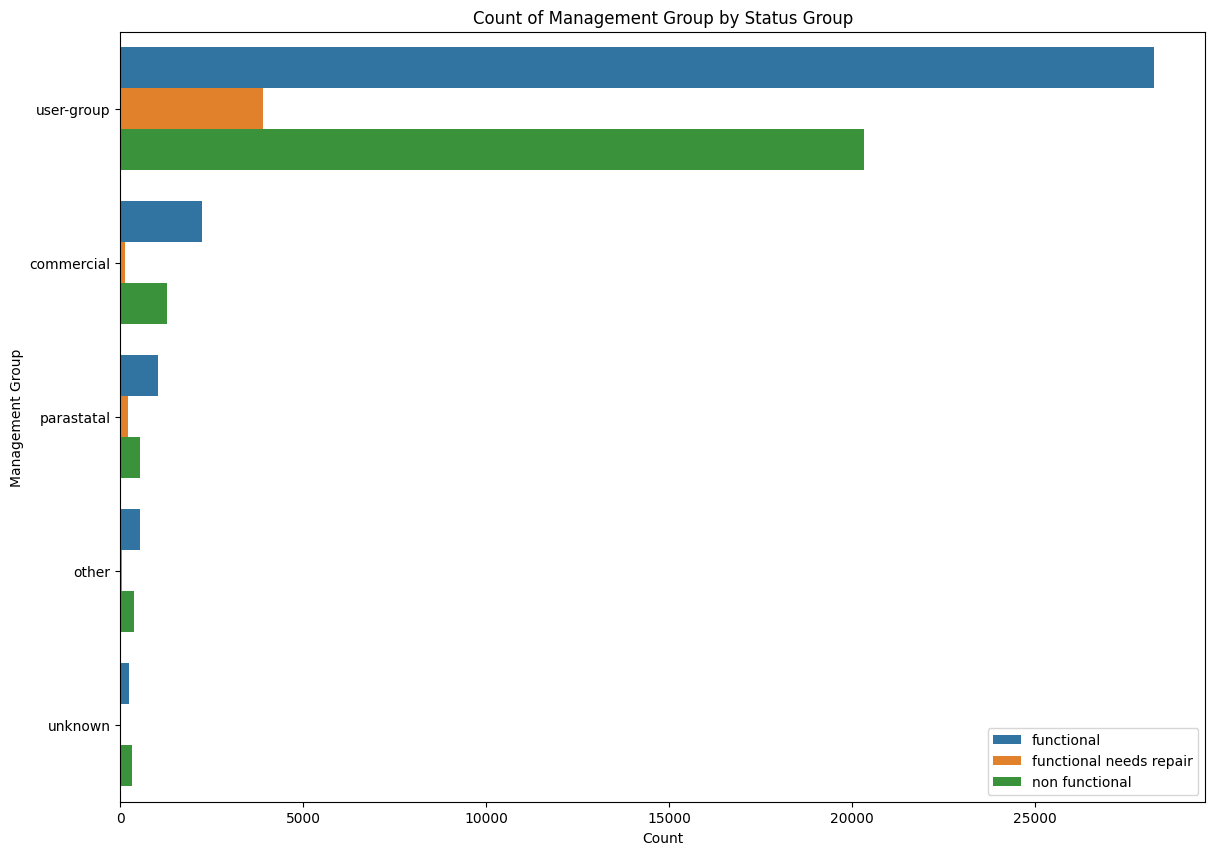

In [ ]:
feature_countplot(
    train_df,
    'management_group',
    'status_group',
    hue_order=status_order,
)

### Additional Features
- `payment` - What the water costs
- `payment_type` - What the water costs
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water
- `quantity` - The quantity of water
- `quantity_group` - The quantity of water
- `source` - The source of the water
- `source_type` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint
- `waterpoint_type_group` - The kind of waterpoint

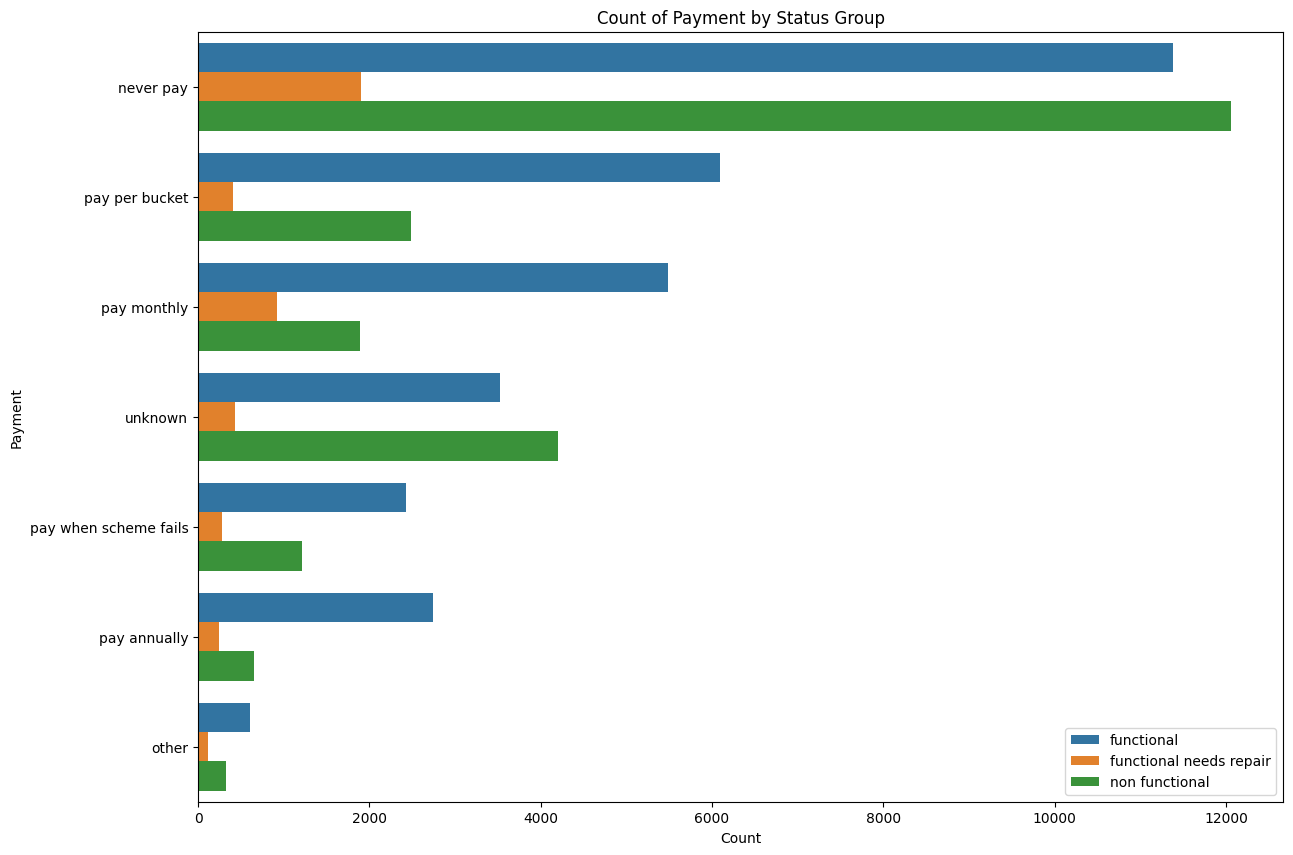

In [ ]:
# Payment
feature_countplot(
    train_df,
    'payment',
    'status_group',
    hue_order=status_order,
)

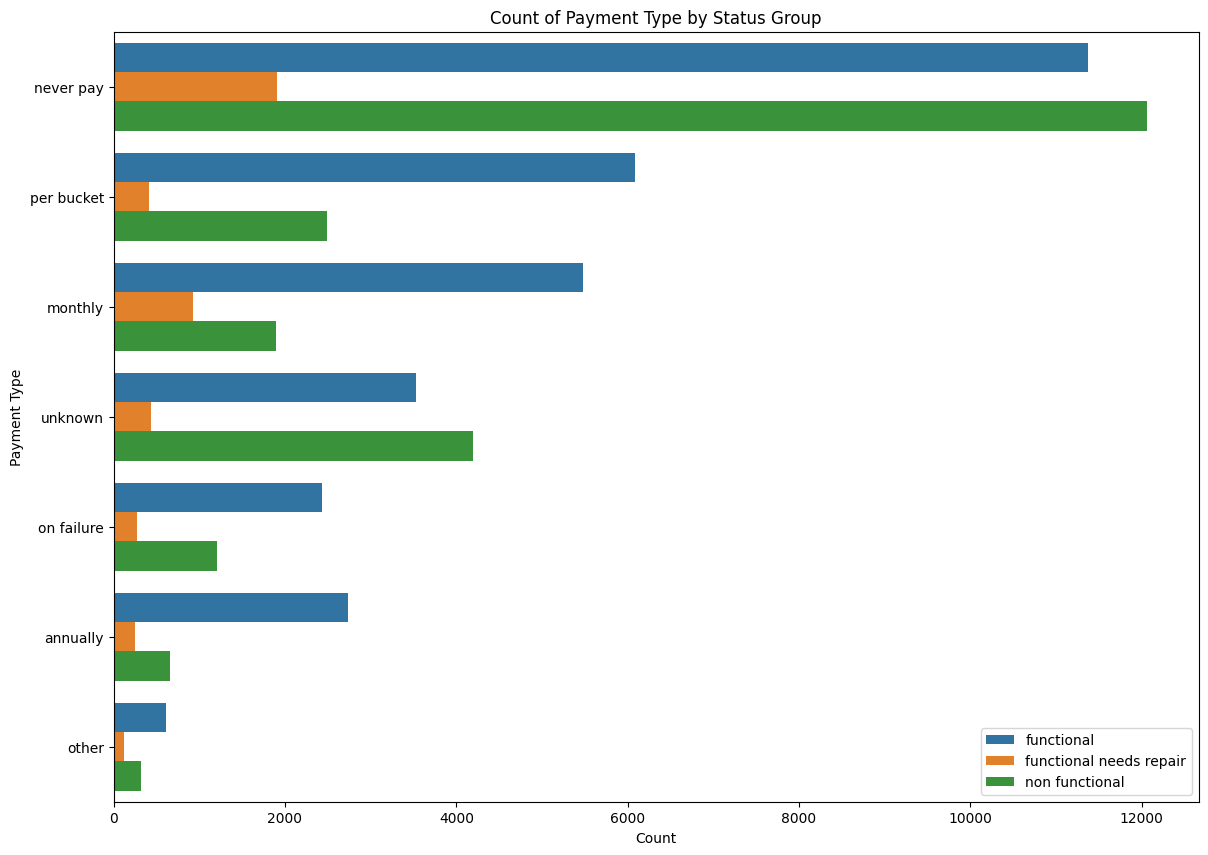

In [ ]:
# Payment Type
feature_countplot(
    train_df,
    'payment_type',
    'status_group',
    hue_order=status_order,
)

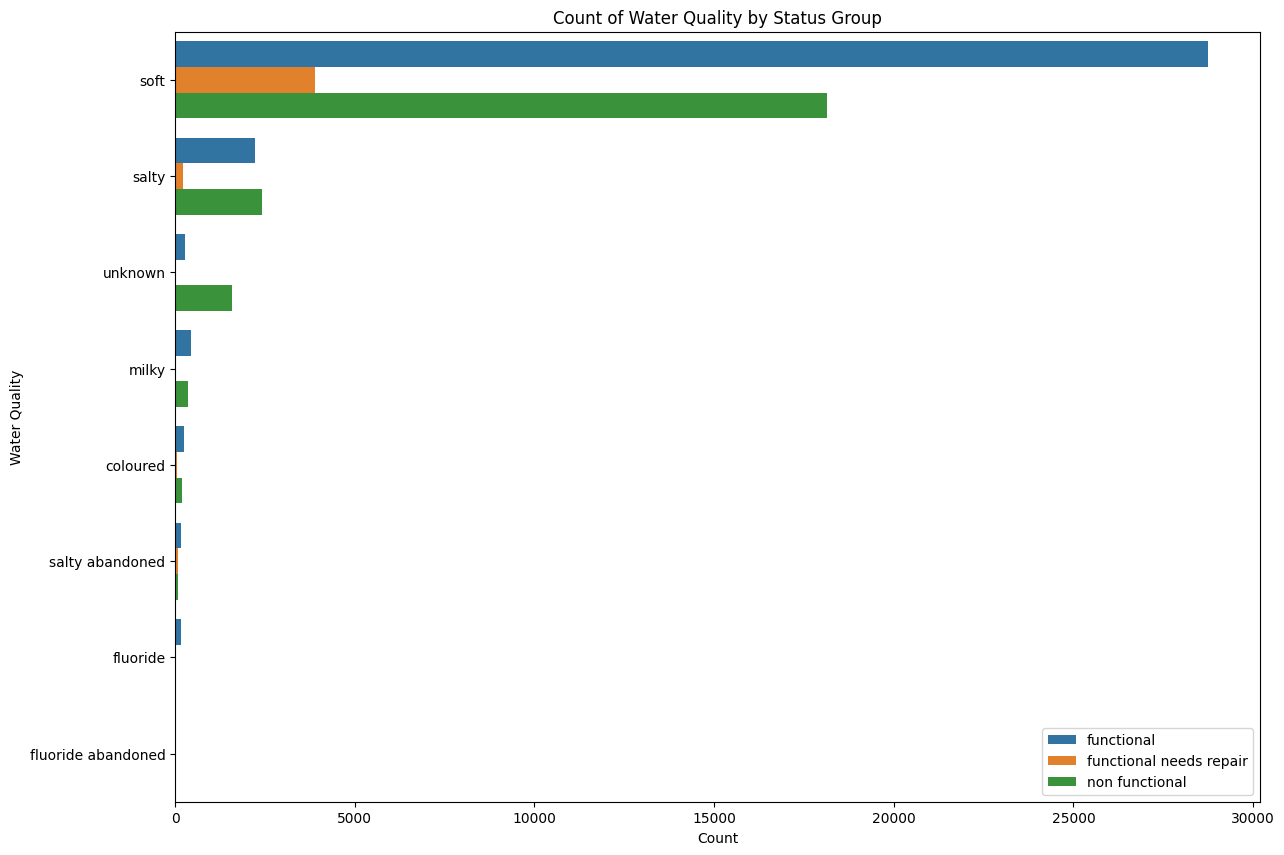

In [ ]:
# Water Quality
feature_countplot(
    train_df,
    'water_quality',
    'status_group',
    hue_order=status_order,
)

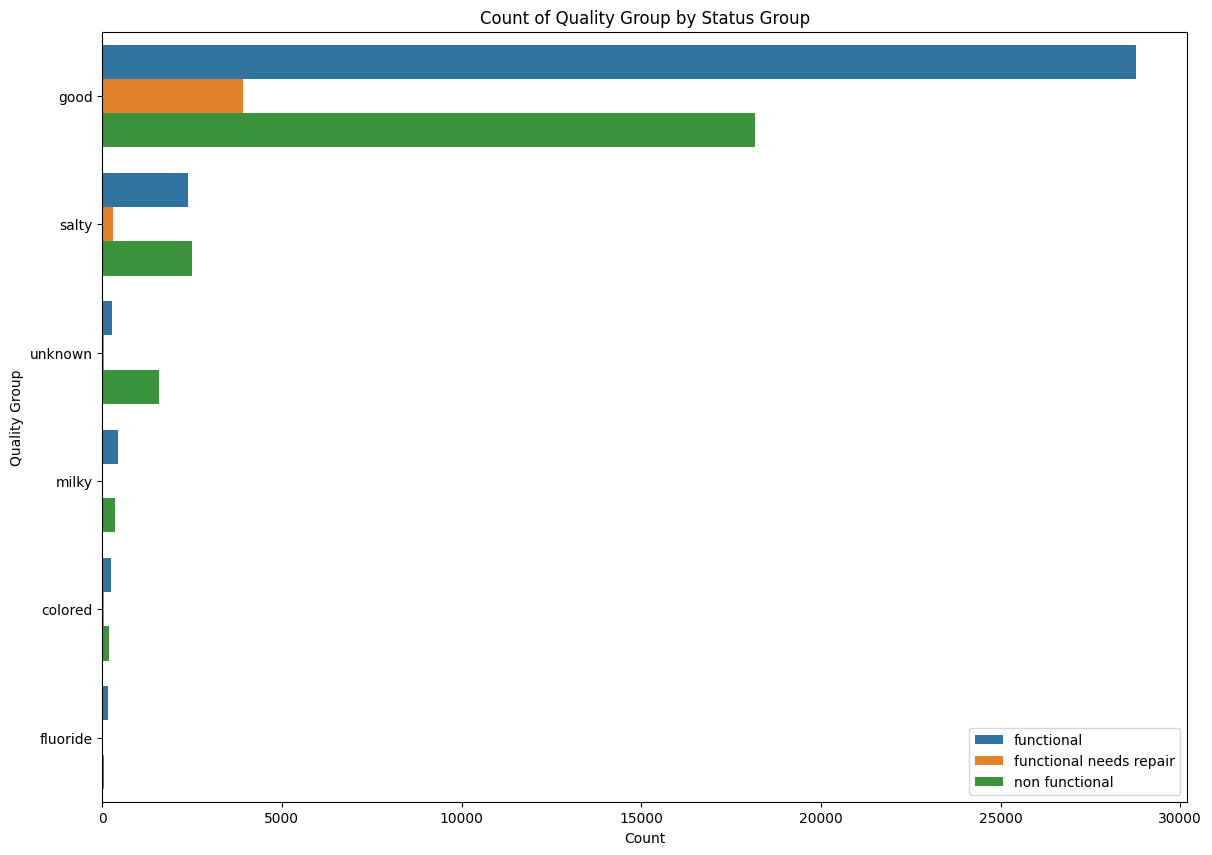

In [ ]:
# Quality Group
feature_countplot(
    train_df,
    'quality_group',
    'status_group',
    hue_order=status_order,
)

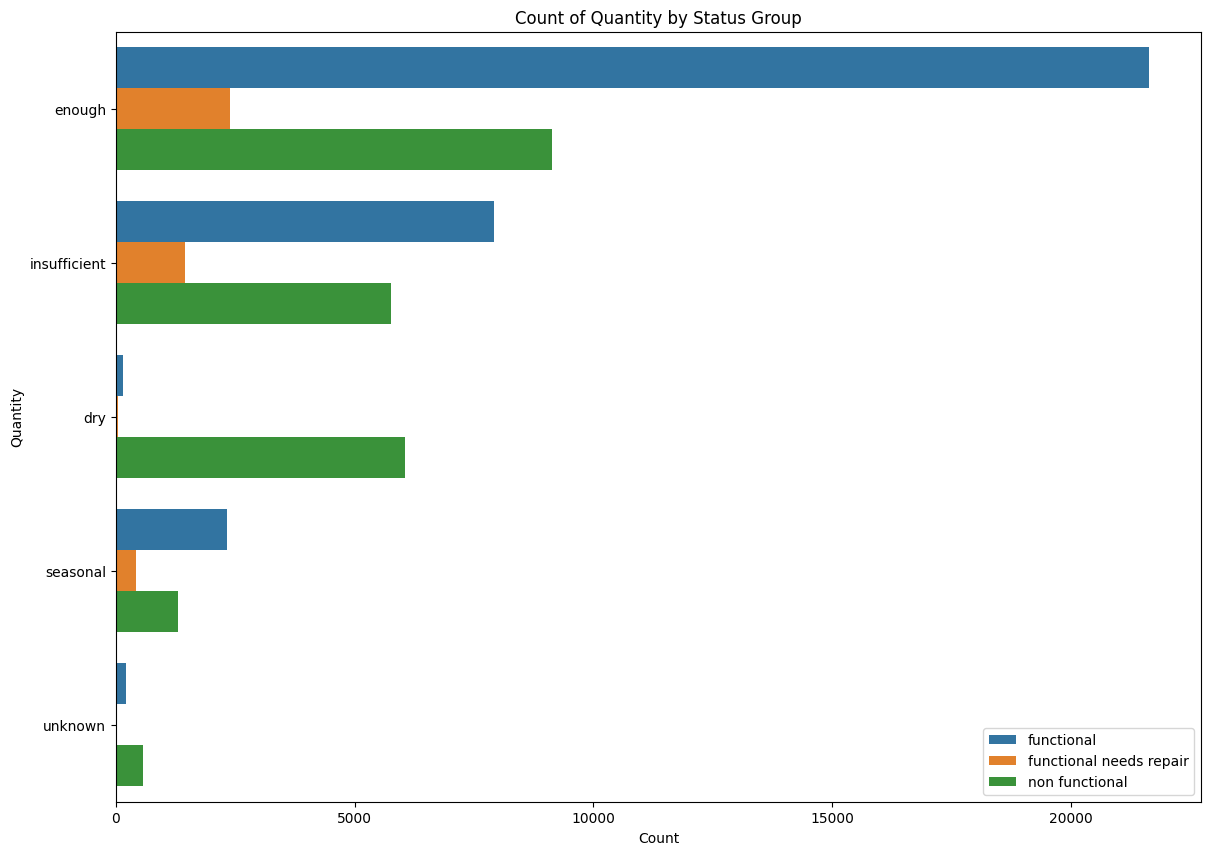

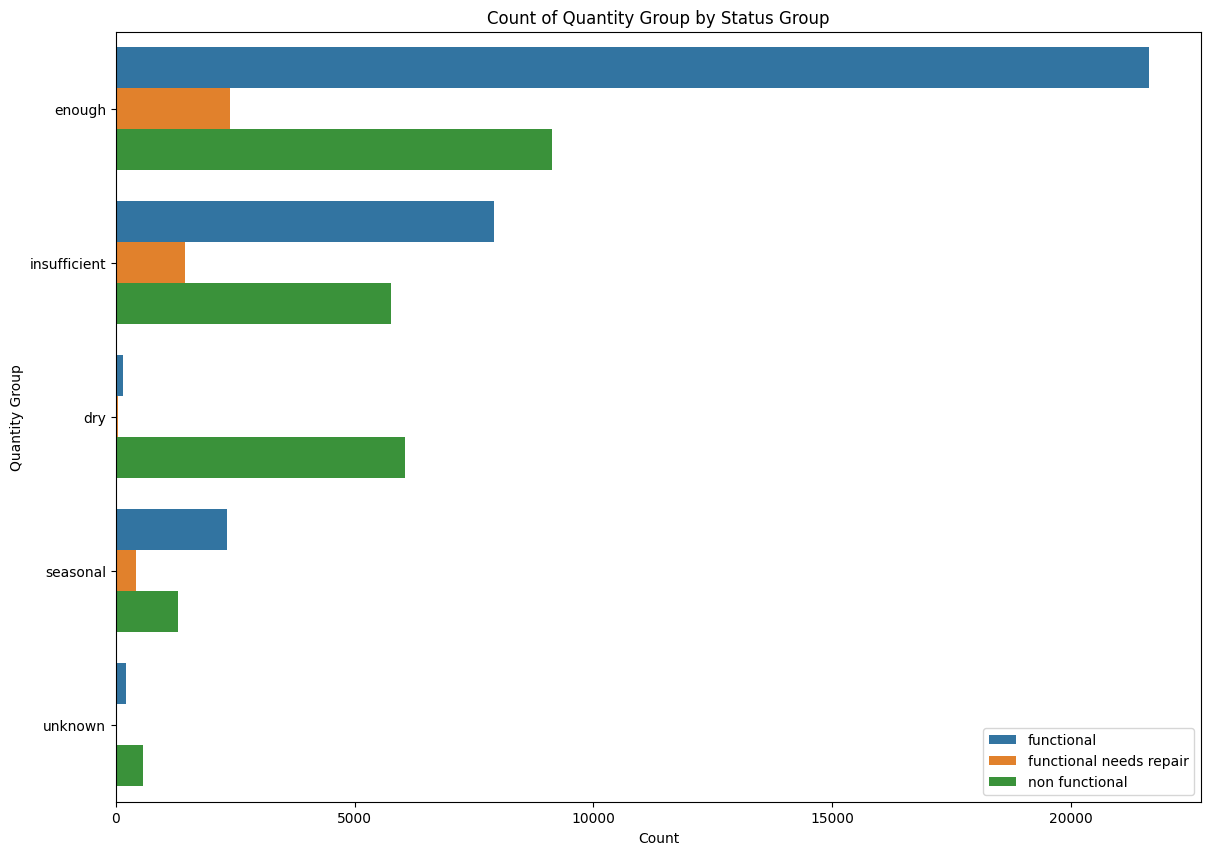

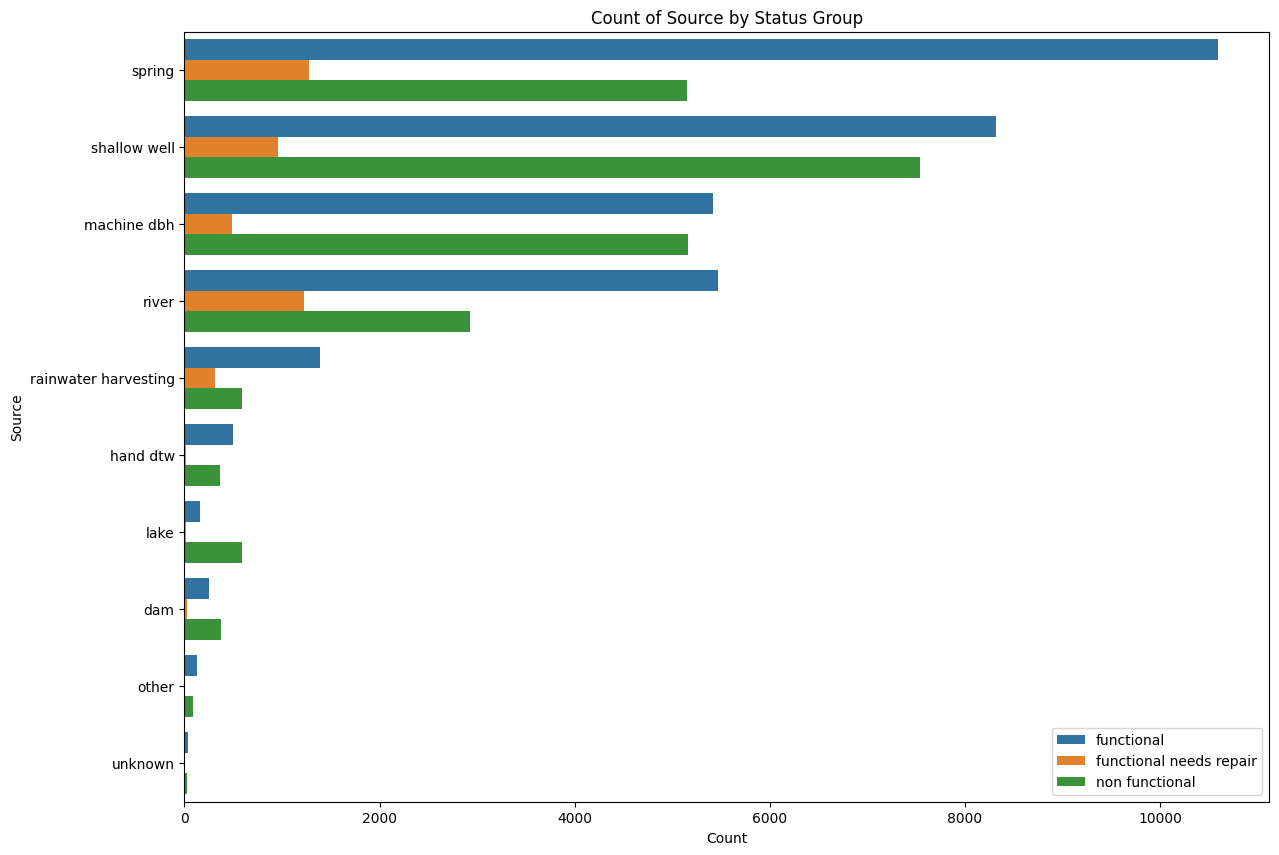

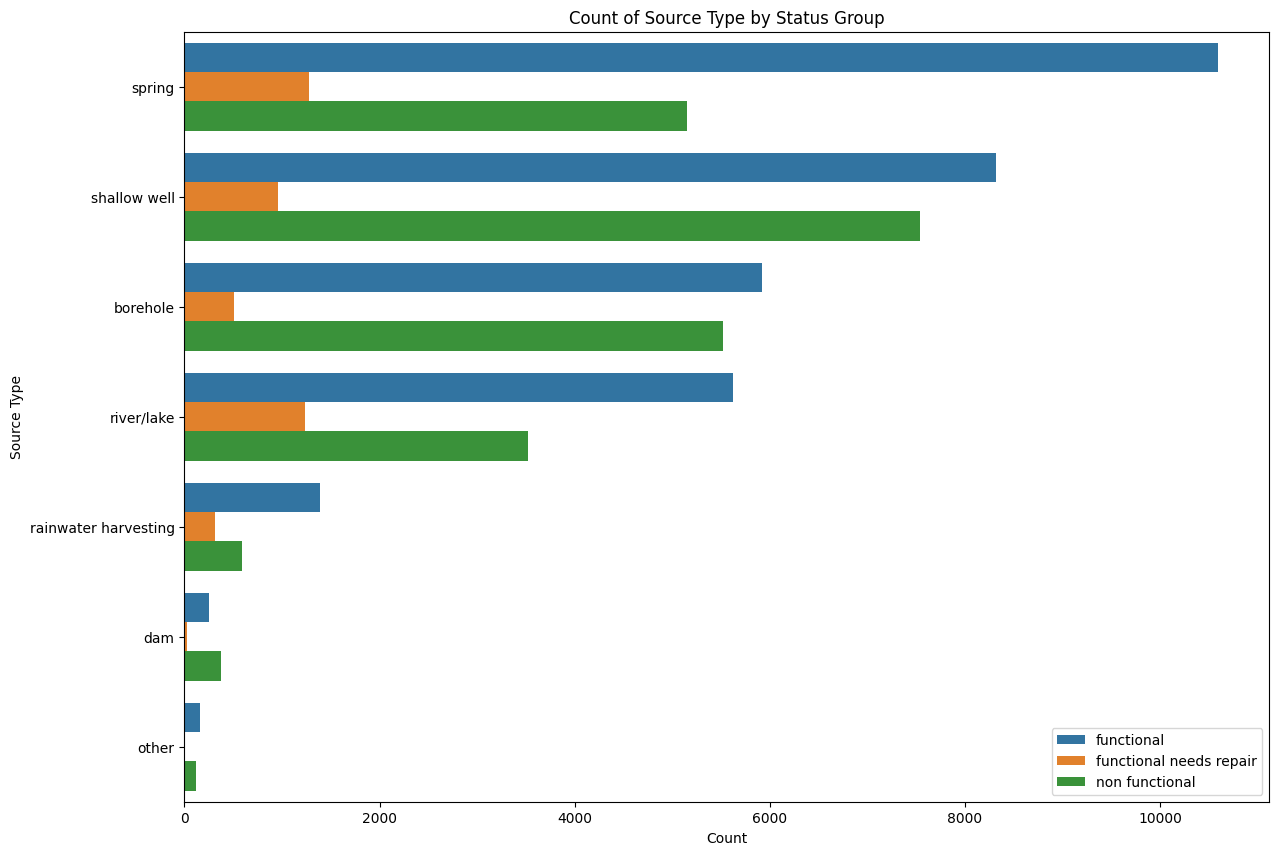

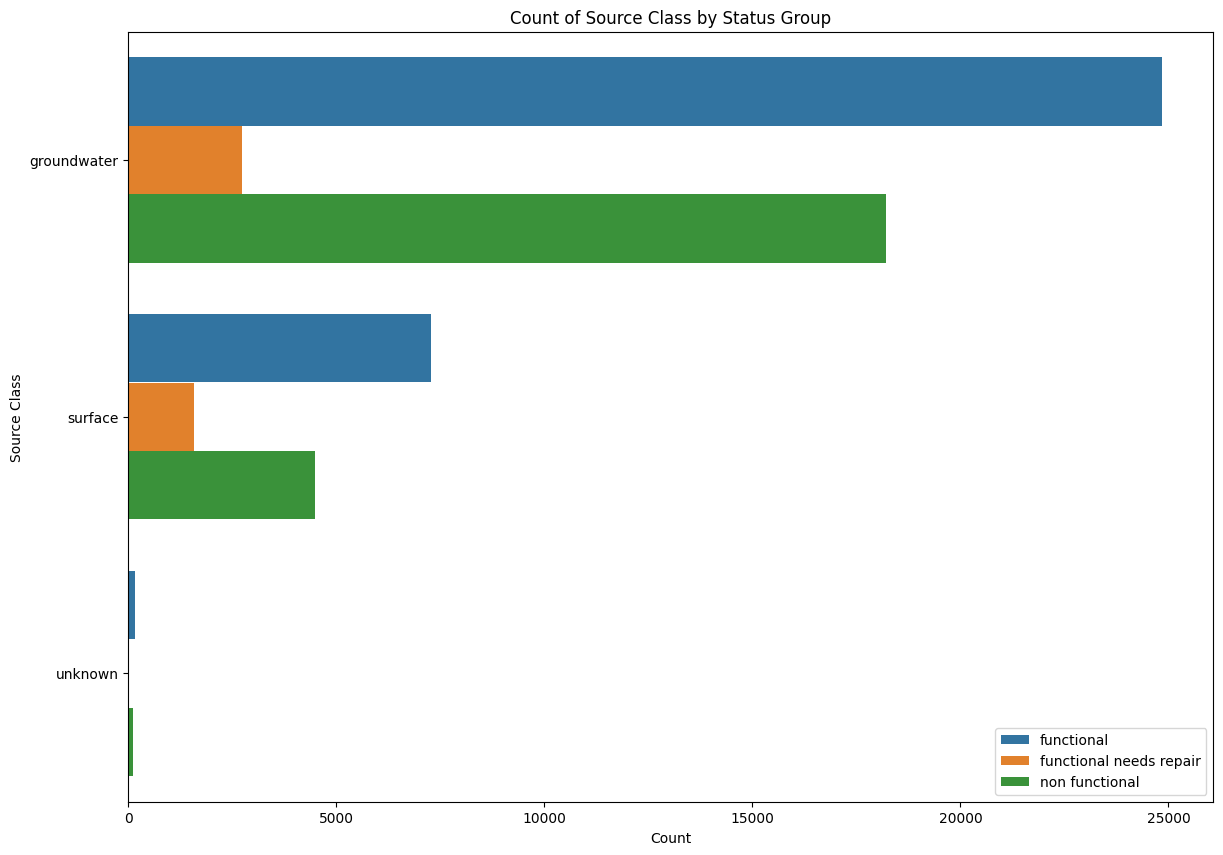

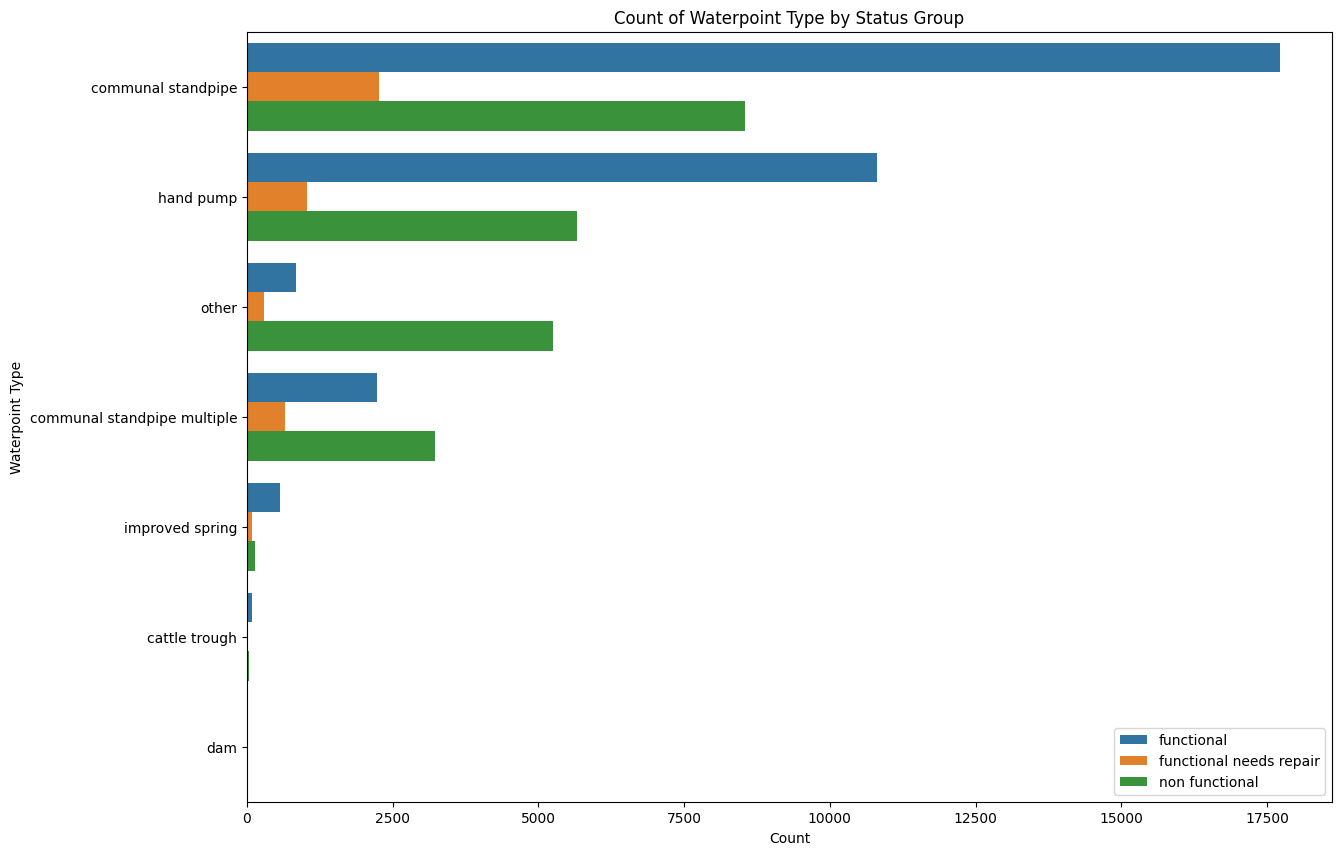

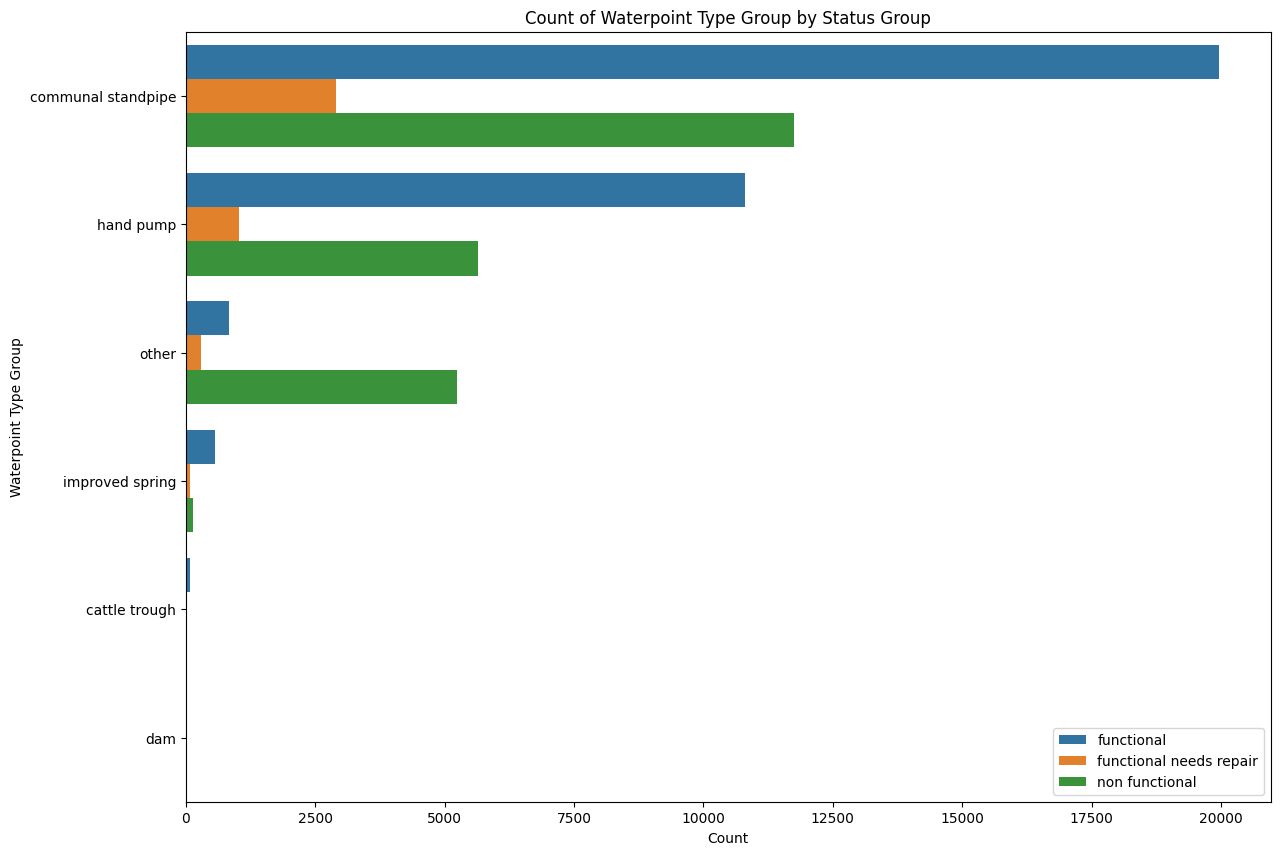

In [ ]:
final_features = ['quantity', 'quantity_group',
                  'source', 'source_type', 'source_class',
                  'waterpoint_type', 'waterpoint_type_group']

for feature in final_features:
    feature_countplot(
        train_df,
        feature,
        'status_group',
        hue_order=status_order,
        top_n=None
)

# EDA Summary:

- No duplicated rows
- 8 features with missing values (`scheme_name` is 35% missing)

#### Target Variable
- `status_group` - Target Variable (3 categories)
	- Consider preprocessing for class imbalance
	- Because final metric is **Classification Rate**, class weights can hurt score

## Changes Needed BEFORE Data Split

#### Dropped Features
- `num_private` - unknown
	- Drop from dataset
- `recorded_by` - Group entering this row of data
	- All the same company; drop feature

#### Initially dropped, but kept because it helped score
- `scheme_name` - Who operates the waterpoint
	- Majority category is missing values
	- Can use `scheme_management`
- `region_code` - Geographic location (coded)
	- Convert to categorical
- `wpt_name` - Name of the waterpoint if there is one
	- Most common value is 'none'
	- Convert missing values to 'unknown' (only 2)
- `payment` - What the water costs
	- Essentially the same as `payment_type`
- `quality_group` - The quality of the water
	- Essentially the same as `water_quality`
- `quantity_group` - The quantity of water
	- Essentially the same as `quantity`
- `source_type` - The source of the water
	- Essentially the same as `source`
- `waterpoint_type_group` - The kind of waterpoint
	- Essentially the same as `waterpoint_type`

#### Numeric Features
- `amount_tsh` - Total static head (amount water available to waterpoint)
	- Log transformation (np.log1p is fine)
- `population` - Population around the well
	- np.log1p transformation looks great
- `longitude` - GPS coordinate
	- Some 0 values (which would not exist in Tanzania)
	- Impute with median `longitude` based on `region_code`
- `latitude` - GPS coordinate
	- Refer to longitude (0 values are actually not zero)
- `gps_height` - Altitude of the well
	- Looks fairly balanced between `status_groups`; no change needed

#### Date Features
- `date_recorded` - The date the row was entered
	- Convert to pd.datetime()
- `construction_year` - Year the waterpoint was constructed
	- ~35% of values have year = 0; turning into categorical

## Changes Needed AFTER Data Split

### Categorical Features
- `funder` - Who funded the well
	- Includes na and 0 values
	- 0 values in `funder` and `installer` are the same in test_features and train_features
- `installer` - Organization that installed the well
	- Includes na and 0 values
- `subvillage` - Geographic location
	- Some categories as single letters or numbers.
	- Rename missing values to 'nan'
- `district_code` - Geographic location (coded)
	- Convert to categorical
- `public_meeting` - True/False (boolean)
	- Has missing values; convert to 'nan'
- `scheme_management` - Who operates the waterpoint
	- Convert missing values to 'nan'
- `permit` - If the waterpoint is permitted (boolean)
	- Convert missing values to 'nan'

### No Changes Needed (Categorical Features)
- `basin` - Geographic water basin
- `region` - Geographic location
- `lga` - Geographic location
- `ward` - Geographic location
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed
- `payment_type` - What the water costs
- `water_quality` - The quality of the water
- `quantity` - The quantity of water
- `source` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint